#Business Understanding

###Context

Sebuah bank di Portugal telah melakukan *marketing campaign* dengan menggunakan metode telemarketing kepada calon nasabahnya pada periode 2008-2013. Data yang telah dikumpulkan akan digunakan untuk bisa mendapatkan dan mengevaluasi efektivitas dari kampanye yang telah dijalankan. Hasil dari evaluasi ini dapat digunakan sebagai salah satu komponen dalam *Decision Support System* (DSS) pada tingkat manajerial untuk sampai pada keputusan yang memaksimalkan efektivitas dari kampanye selanjutnya dan mengevaluasi dari kampanye yang ada. Harapan dari output penelitian ini adalah campaign yang dapat memaksimalkan output sekaligus mengetahui apakah ada dampak yang tidak terlihat sebelumnya menggunakan metode tradisional non-ML



###Problem Statement

Proses telemarketing dapat memakan waktu dan sumberdaya manusia (*manpower*) yang signifikan jika tidak dilakukan dengan target yang efektif dan cara yang tepat. Di sisi lain, perusahaan juga akan mengalami potensi kehilangan income (*revenue lost*) jika salah mengidentifikasi profile nasabah. Penggunaan teknik Machine Learning dapat membantu perusahaan untuk mengevaluasi proses telemarketing sekaligus menjadi bahan pertimbangan untuk kampanya telemarketing yang akan datang

###Metode Evaluasi

Pada saat melakukan evaluasi model maka diperlukan metode evaluasi yang mempertimbangkan tingkat error untuk mendapatkan hasil yang seimbang sehingga tidak terdapat sumber daya yang terpakai secara tidak efisien dan juga tidak kehilangan nasabah yang berpotensi melakukan deposit

Kami memutuskan untuk melakukan evaluasi menggunakan *Recall*. Hal ini disebabkan karena recall dapat menangkap calon nasabah yang akan melakukan Deposito. Hal ini dapat dijelaskan karena recall akan menebak atau memprediksi nasabah yang akan melakukan deposit dan secara aktual melakukan deposit. Hal ini penting dilakukan karena imbalance data yang tersedia menyebabkan customer yang melakukan deposit memiliki nilai yang lebih tinggi.

Dengan menggunakan nilai recall, maka bisa didapatkan juga nilai atau prediksi customer yang *salah* mengidentifikasi melakukan deposit sehingga dapat dijadikan acuan untuk perbaikan model atau evaluasi kedepannya bagi usaha telemarketing



# Data Understanding


## Load Data

In [ ]:
import pandas as pd

data = pd.read_csv('bank-additional-full.csv', sep=';')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Info Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Dalam dataset terdiri dari 41188 baris dan 21 kolom. Sebagian besar kolom memiliki tipe data yaitu "objek", antara lain kolom "job", "marital", "education", dan lain sebagainya. 5 kolom memiliki tipe data float64 yang berisi numerik atau angka-angka. Kolom "y" berupa kolom target yang akan dianalisis lebih lanjut.

## Info Type Data

In [ ]:
data_kategorik = data.select_dtypes(include='object').columns
data_kategorik

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [ ]:
len(data_kategorik)

11

In [ ]:
data_numerik = data.select_dtypes(include='number').columns
data_numerik

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [ ]:
len(data_numerik)

10

Data-bank-additional memiliki type data :


*   kategorik = 11
*   numerik = 10




## Deskripsi column

| No | Kolom          | Deskripsi                                                                                   |
| -- | -------------- | ------------------------------------------------------------------------------------------- |
| 1  | age            | Usia nasabah dalam tahun.                                                                   |
| 2  | job            | Pekerjaan nasabah (contoh: housemaid, admin, technician).                                   |
| 3  | marital        | Status perkawinan nasabah (married, single, divorced).                                      |
| 4  | education      | Tingkat pendidikan nasabah (basic.4y, high.school, university).                             |
| 5  | default        | Apakah nasabah memiliki kredit macet sebelumnya (yes/no).                                   |
| 6  | housing        | Apakah nasabah memiliki pinjaman rumah (yes/no).                                            |
| 7  | loan           | Apakah nasabah memiliki pinjaman pribadi (yes/no).                                          |
| 8  | contact        | Cara kontak nasabah terakhir (cellular, telephone).                                         |
| 9  | month          | Bulan terakhir kontak dilakukan (may, jun, dll).                                            |
| 10 | day_of_week    | Hari dalam minggu terakhir kontak dilakukan (mon, tue, dll).                                |
| 11 | duration       | Durasi panggilan terakhir (dalam detik).                                                    |
| 12 | campaign       | Jumlah kontak selama kampanye ini untuk nasabah ini.                                        |
| 13 | pdays          | Jumlah hari sejak kontak terakhir pada kampanye sebelumnya (999 jika belum pernah dikontak). |
| 14 | previous       | Jumlah kontak sebelum kampanye ini untuk nasabah ini.                                       |
| 15 | poutcome       | Hasil kampanye sebelumnya (success, failure, nonexistent).                                  |
| 16 | emp.var.rate   | Variasi tingkat pekerjaan kuartal ekonomi.                                                  |
| 17 | cons.price.idx | Indeks harga konsumen (consumer price index).                                               |
| 18 | cons.conf.idx  | Indeks kepercayaan konsumen (consumer confidence index).                                    |
| 19 | euribor3m      | Suku bunga Euribor 3 bulan, mengacu ke Bank Sentral Eropa.                                                                 |
| 20 | nr.employed    | Jumlah karyawan pada bank atau perusahaan terkait, dihitung per kuartal.                                          |
| 21 | y              | Target: Apakah nasabah melakukan deposit jangka panjang (yes/no).                           |


## Data Aggregation


- Ini hanya untuk identifikasi awal untuk melihat value aggregation pada data numerik, hal ini dapat digunakan untuk melihat struktur data di awalan penelitian

In [ ]:
data[data_numerik].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Missing Value

In [ ]:
data.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


Pada Dataset ini, sekilas terlihat tidak adanya missing values, akan tetapi jika melihat sumber data di Kaggle maka missing values yang dimaksud adalah Unknown.

## Data Duplicate

In [ ]:
data.duplicated().sum()

np.int64(12)

# Data Cleaning

In [ ]:
unknown_counts = (data == "unknown").sum()
unknown_percent = (unknown_counts / len(data)) * 100

unknown_df = unknown_counts.to_frame(name='unknown_count')
unknown_df['unknown_percent'] = unknown_percent
unknown_df.sort_values(by='unknown_count', ascending=False)




,unknown_count,unknown_percent
default,8597,20.872584
education,1731,4.202680
housing,990,2.403613
loan,990,2.403613
job,330,0.801204
marital,80,0.194231
age,0,0.000000
contact,0,0.000000
month,0,0.000000
day_of_week,0,0.000000


Selanjutnya adalah mengidentifikasi column yang memiliki value unknown 4 teratas pada 1 row

## Identifikasi 4 column yang memiliki value unknown pada 1 row

In [ ]:
unknown = ['education','default','housing','loan']

# Filter baris yang ketiga kolomnya 'unknown'
unknown_rows = data[(data[unknown[0]] == 'unknown') &
                    (data[unknown[1]] == 'unknown') &
                    (data[unknown[2]] == 'unknown') &
                    (data[unknown[3]] == 'unknown')]

unknown_rows


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
768,38,technician,married,unknown,unknown,unknown,unknown,telephone,may,wed,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
1949,34,blue-collar,married,unknown,unknown,unknown,unknown,telephone,may,fri,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2006,57,blue-collar,married,unknown,unknown,unknown,unknown,telephone,may,mon,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2723,45,unknown,married,unknown,unknown,unknown,unknown,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
4343,38,blue-collar,divorced,unknown,unknown,unknown,unknown,telephone,may,tue,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
7329,42,blue-collar,married,unknown,unknown,unknown,unknown,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,no
8839,59,technician,married,unknown,unknown,unknown,unknown,telephone,jun,thu,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,no
10641,49,admin.,single,unknown,unknown,unknown,unknown,telephone,jun,tue,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
10923,51,blue-collar,divorced,unknown,unknown,unknown,unknown,telephone,jun,wed,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
11047,57,blue-collar,divorced,unknown,unknown,unknown,unknown,telephone,jun,wed,...,8,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no


Baris "Unknown" terdefinisi sebagai nilai yang hilang. Baris "Unknown" terdapat di beberapa kolom dalam dataset. Baris tersebut juga terletak pada empat kolom dataset yaitu "education", "default", "housing", dan "loan". 18 baris di atas dapat dihapus dikarenakan data yang tersedia kurang jelas dan value target/y no keseluruhannya

## Delete Data

- data duplicate

In [ ]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

np.int64(0)

- Menghapus data nasabah yang memiliki value "UNKNOWN" pada empat kolom yaitu  "education", "default", "housing", dan "loan"

In [ ]:
data.drop(unknown_rows.index, inplace=True) # fungsi indek itu untuk mengembalikan list dari unknown rows

- mengecek ulang data yang memilki value unknown pada keempat rows

In [ ]:
unknown = ['education','default','housing','loan']

# Filter baris yang ke4 kolomnya 'unknown'
unknown_rows = data[(data[unknown[0]] == 'unknown') &
                    (data[unknown[1]] == 'unknown') &
                    (data[unknown[2]] == 'unknown') &
                    (data[unknown[3]] == 'unknown')]

unknown_rows

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


## Save data clean untuk EDA dan Dashboard

- Untuk EDA

In [ ]:
data.reset_index(drop=True, inplace=True)
data.to_csv('data_eda.csv', index=False)

Data EDA akan digunakan selanjutnya untuk diolah lebih lanjut

- Untuk Dashboard

In [ ]:
data.reset_index(drop=True, inplace=True)
data.to_csv('data_dashboard.csv', index=False , sep=';')

Data EDA untuk dashboard selanjutnya akan digunakan sebagai data mentah yang ditampilkan pada Tableu

# Explorasi Data

## Distribusi Data

- Grafik distribusi (column numerik)

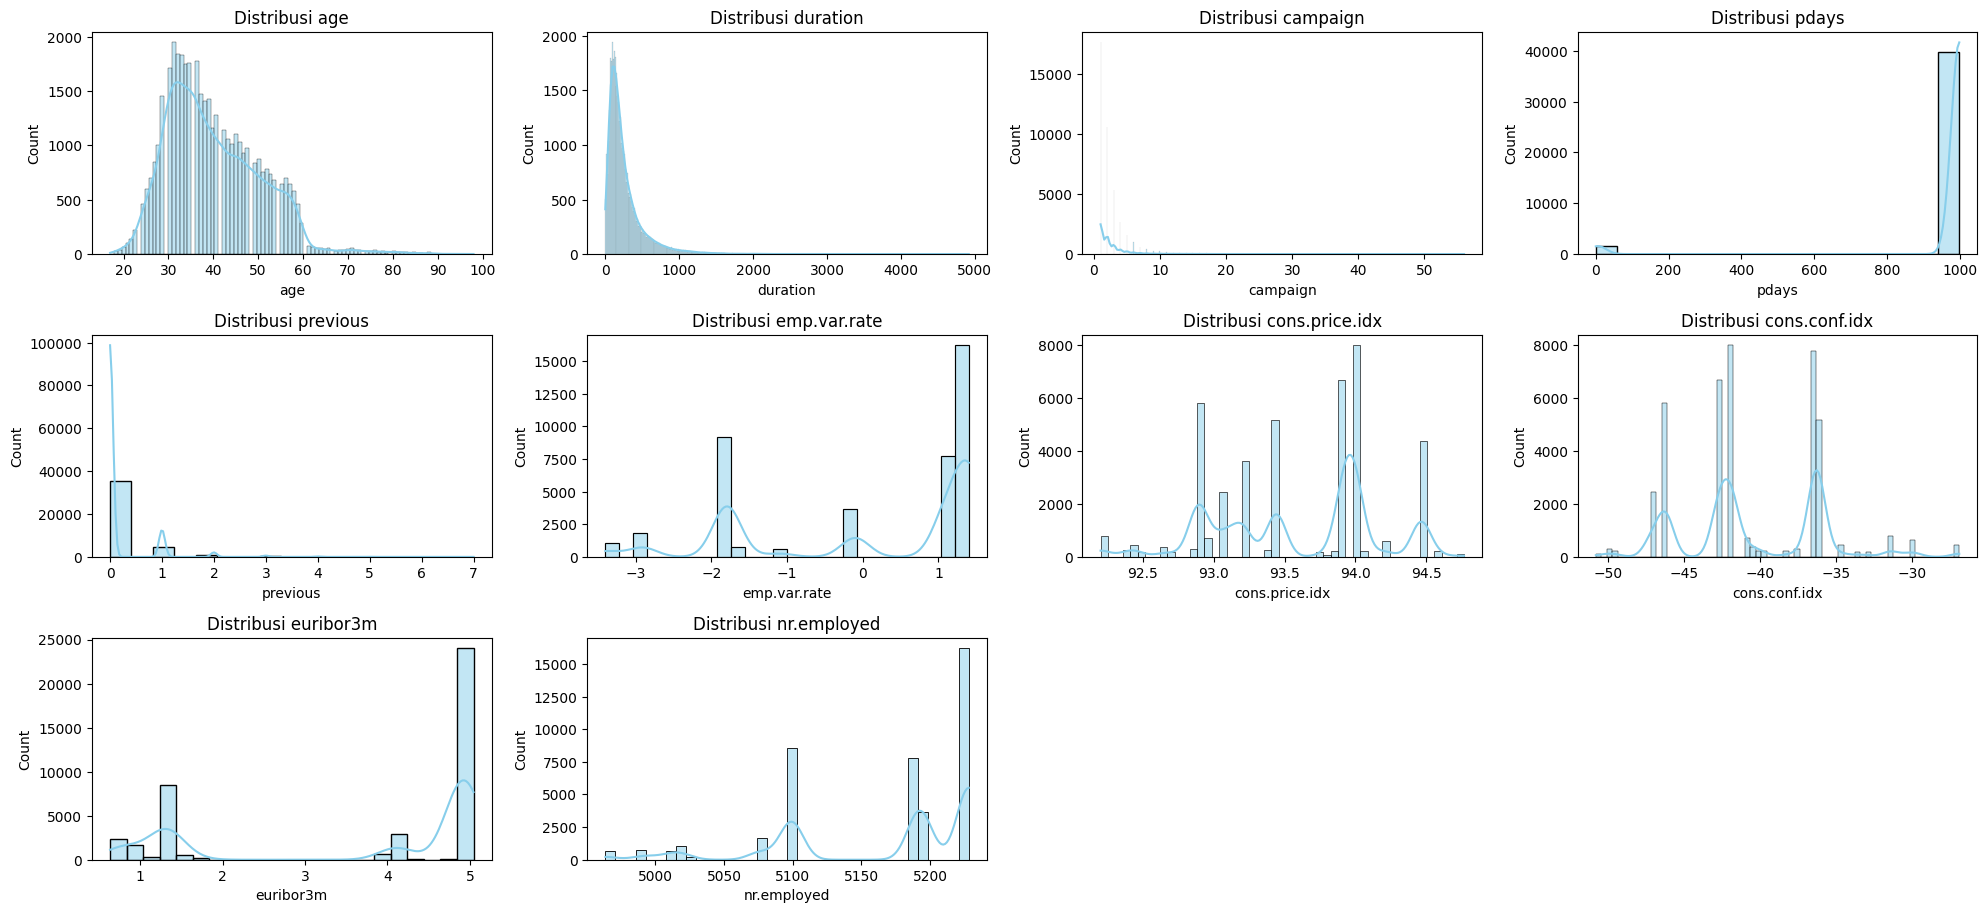

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data_eda = pd.read_csv('data_eda.csv')

cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Plot distribusi dan outlier
plt.figure(figsize=(20, 30))

for i, col in enumerate(cols):
    plt.subplot(10, 4, i+1)
    sns.histplot(data_eda[col], kde=True, color='skyblue')
    plt.title(f'Distribusi {col}')


plt.tight_layout()
plt.show()

- Uji normalitas Data (column numerik). Kami menggunakan uji Shapiro-Wilk karena data yang ada berjumlah lebih dari 5000 data.

In [ ]:
import scipy.stats as stats
import numpy as np
import pandas as pd

data_sample = data_eda.sample(5000)

# Uji Shapiro-Wilk
for col in data_sample[cols].columns:
    stat, p = stats.shapiro(data_sample[cols][col])
    print(f"Kolom: {col}")
    print(f"  Shapiro-Wilk Test Statistic: {stat}")
    print(f"  Shapiro-Wilk p-value: {p}")
    if p > 0.05:
        print(f"{col} memiliki distribusi normal.\n")
    else:
        print(f"{col} tidak memiliki distribusi normal.\n")

Kolom: age
  Shapiro-Wilk Test Statistic: 0.9558373553395443
  Shapiro-Wilk p-value: 1.88273884151297e-36
age tidak memiliki distribusi normal.

Kolom: duration
  Shapiro-Wilk Test Statistic: 0.7279262287955206
  Shapiro-Wilk p-value: 1.5238191823342476e-67
duration tidak memiliki distribusi normal.

Kolom: campaign
  Shapiro-Wilk Test Statistic: 0.5394286622293875
  Shapiro-Wilk p-value: 2.2044946772172334e-78
campaign tidak memiliki distribusi normal.

Kolom: pdays
  Shapiro-Wilk Test Statistic: 0.18565672967815372
  Shapiro-Wilk p-value: 4.7431603191786545e-91
pdays tidak memiliki distribusi normal.

Kolom: previous
  Shapiro-Wilk Test Statistic: 0.4125574608100081
  Shapiro-Wilk p-value: 1.1319742906486643e-83
previous tidak memiliki distribusi normal.

Kolom: emp.var.rate
  Shapiro-Wilk Test Statistic: 0.7610101614848536
  Shapiro-Wilk p-value: 5.321058738245836e-65
emp.var.rate tidak memiliki distribusi normal.

Kolom: cons.price.idx
  Shapiro-Wilk Test Statistic: 0.9329753806845

Berdasarkan uji Shapiro-Wilk maka terlihat bahwa distribusi dalam dataset yaitu distribusi tidak normal.

- Persebaran Distribusi fitur(column numerik) terhadap target(column y)

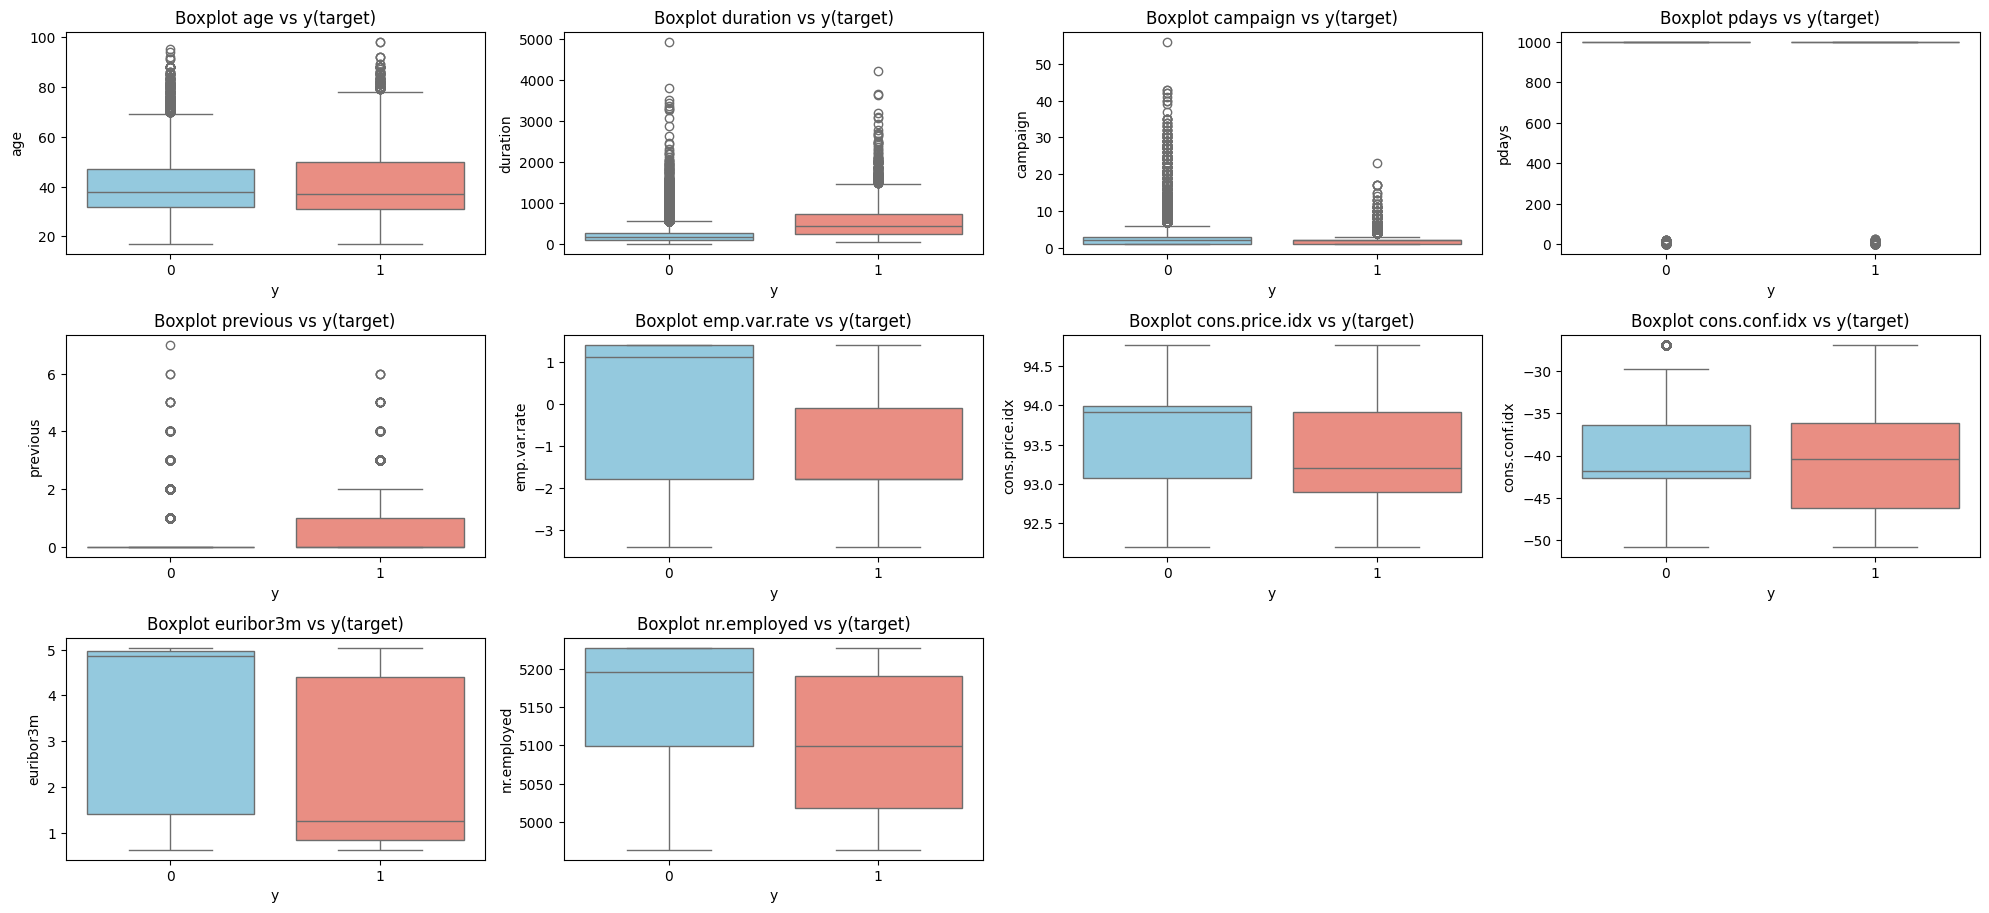

In [ ]:
data_eda_copy = data_eda.copy() # supaya data original pada column target tidak berubah
data_eda_copy['y'] = data_eda_copy['y'].map({'yes': 1, 'no': 0}) # mengubah column y menjadi numerik  untuk melihat persebaran fitur terhadap target

plt.figure(figsize=(20, 30))

for i, col in enumerate(cols):
    plt.subplot(10, 4, i+1)
    sns.boxplot(data=data_eda_copy, x='y', y=col, hue='y',
                palette={0: 'skyblue', 1: 'salmon'}, dodge=False, legend=False)
    plt.title(f'Boxplot {col} vs y(target)')

plt.tight_layout()
plt.show()


Dataset memiliki distribusi yang tidak tersebar merata, hal ini wajar karena persebaran efektivitas sebuah kampanye jarang mengikuti distribusi normal. Kondisi ini normal terjadi di data kredit, kesehatan dan juga asuransi. Dalam menggunakan Machine Learning, perlu ada perlakuan khusus untuk dapat menggunakan dataset ini agar ketimpangan distribusi tidak memengaruhi hasil akhir. Untuk menggambarkan ketimpangan distribusi, di fitur target, hanya 12% nasabah yang melakukan deposit sedangkan sisa nya tidak melakukan deposit lebih lanjut. Bentuk dari distribusi data ini penting diingat saat melakukan perlakuan terhadap resampling karena tanpa penanganan yang baik, bisa muncul variasi yang berujung pada berkurangnya akurasi model atau bertambahnya bias model. Dalam analisis statistika pun, ketidakseimbangan data akan tidak terlalu terlihat secara mendetail sedangkan dalam penggunaan Machine Learning, ketidakseimbangan data dapat diakali dengan teknik yang tepat atau dengan pilihan model

## Outlier Data

In [ ]:
def check_outlier(data_eda, cols):
    hasil_outlier = {}
    for col in cols:
        q1 = data_eda[col].quantile(0.25)
        q3 = data_eda[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        outliers = data_eda[(data_eda[col] < lower_bound) | (data_eda[col] > upper_bound)]
        hasil_outlier[col] = {
            'jumlah_outliers' : outliers.shape[0],
            'Persentase Outlier': (outliers.shape[0] / data_eda.shape[0]) * 100
        }
    return pd.DataFrame(hasil_outlier).T
check_outlier(data_eda, cols).sort_values(by='Persentase Outlier', ascending=False)

,jumlah_outliers,Persentase Outlier
previous,5625.0,13.666845
duration,2962.0,7.196657
campaign,2405.0,5.843335
pdays,1515.0,3.680937
age,468.0,1.137081
cons.conf.idx,446.0,1.083629
emp.var.rate,0.0,0.000000
cons.price.idx,0.0,0.000000
euribor3m,0.0,0.000000
nr.employed,0.0,0.000000


## Korelasi Fitur(numerik) terhadap target

In [ ]:
data_numerik = data_eda_copy.select_dtypes(include='number')# kenapa data_eda_copy karena column target sudah diubah menjadi numerik yes =1 no = 0
data_numerik.corr(method='spearman')['y'].sort_values(ascending=False) # column y sudah diganti valuenya menjadi numerik saat ingin tahu persebaran fitur terhadap target

,y
y,1.000000
duration,0.348875
previous,0.200886
cons.conf.idx,0.041182
age,-0.011833
campaign,-0.063643
cons.price.idx,-0.122065
emp.var.rate,-0.247384
euribor3m,-0.266760
nr.employed,-0.283902


Nilai di atas merupakan hasil dari korelasi fitur kolom numerik terhadap target (kolom "y"). Nilai-nilai di atas pada setiap kolom berbeda-beda. Nilai pada kolom yang mendekati 1 menunjukkan korelasi positif terhadap target. Korelasi fitur terbesar terhadap target berada pada kolom "duration" dengan nilai 0.348784. Hal ini sekilas menunjukan bahwa terdapat kemungkinan terjadinya **data leakage** pada prediksi karena duration menunjukan karakteristik rolling value terhadap target variable

###**Analisis lanjutan**

**Hubungan Euribor dan target serta krisis Ekonomi di Eropa pasca 2008**

Salah satu hubungan yang terlihat setelah melakukan analisis korelasi numerik adalah hubungan negatif antara euribor3m dengan target variable, hal ini menunjukan angka negatif, artinya semakin tinggi nilai Euribor maka justru semakin sedikit orang yang melakukan deposit, hal ini terdengar *counterintuitive* tetapi hal ini dapat dijelaskan dengan konteks sosial ekonomi pada tahun 2008 atau paska krisis ekonomi eurozone. Pada periode ini, masyarakat cenderung ingin memiliki *saving* terlepas dari besarnya jumlah deposito yang ditawarkan dan diacukan oleh bank sentral Eropa. Hal ini dikarenakan sentimen masyarakat yang memiliki kekhawatiran tinggi setelah krisis di tahun 2008.
Hal ini akan terlihat sebagai nilai negatif saat melakukan data analisis sederhana tanpa menggunakan Machine Learning tapi akan bisa ditangkap jika menggunakan pola Machine Learning.

**Hubungan Ekonomi Makro dengan Deposit Nasabah**

Beberapa variable lain menunjukan korelasi yang bervariasi, sebagai contoh fitur ekonomi makro (euribor, employment, emp var rate) juga menunjukan korelasi negatif, hal ini menunjukan pola yang mirip dengan Euribor yang menunjukan bahwa semakin buruk performa ekonomi makro maka nilai target variable atau kemungkinan nasabah melakukan deposito juga akan semakin kecil. Perlu dilakukan analisis Machine Learning lanjutan untuk mendapatkan interaksi antara 3 fitur ini.

**Jarak antara kontak terakhir dan Deposito Nasabah**

Dari nilai negatif antara p.days dan target variabel maka dapat disimpulkan juga bahwa semakin jauh jarak antara kontak terakhir dengan nasabah makan kemungkinan nasabah melakukan deposito juga akan semakin kecil. Hal ini sesuai dengan teori psikologis dan dapat menentukan **Golden Period** dimana seorang nasabah dapat dijadikan target kampanye untuk meningkatkan kemungkinan melakukan deposito



###**Kesimpulan Awal untuk data Numerik**

Berdasarkan analisis ini saja, kita dapat menyimpulkan bahwa profil nasabah (pendidikan, status kredit), konteks kampanye (bulan, hasil sebelumnya, durasi telepon), dan kondisi ekonomi makro semuanya memainkan peran penting dalam keberhasilan kampanye telemarketing ini. Untuk mendapatkan analisis yang lebih akurat mengenai hubungan interaksi *antar* variable maka perlu dilakukan analisis Machine Learning lanjutan. Melihat korelasi yang kuat antara durasi dengan target variable maka penelitian ini akan melakukan scaling untuk mencegah ada nya leakage pada data training dan test

In [ ]:
data_eda_copy # untuk mengecek apakah column target benar sudah dirubah ke numerik

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41153,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41154,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41155,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41156,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


Dataset terbaru dengan 41176 baris dan 22 kolom. Pengurangan baris dari nilai "Unknown" yang terletak pada empat kolom ("education", "default", "housing", dan "loan"). Kolom terbaru yaitu mendefinisikan kolom target "y", yaitu "0" sebagai "no" dan "1" sebagai "yes".

##EDA untuk data Kategorik

In [ ]:
from scipy.stats import chi2_contingency

Analisis Fitur Data Kategorik: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

--- Analisis Fitur Data Kategorik ---

Analyzing Feature: 'job'
----------------------------------------
Contingency Table:
y                no   yes
job                      
admin.         9066  1351
blue-collar    8605   638
entrepreneur   1332   124
housemaid       954   106
management     2596   328
retired        1284   434
self-employed  1272   149
services       3642   323
student         600   275
technician     6007   730
unemployed      870   144
unknown         291    37

Hasil Test Chi-Square Test:
  P-value: 5.981264395953297e-199
  => Hubungan antara 'job' dan deposit signifikan secara statistik.


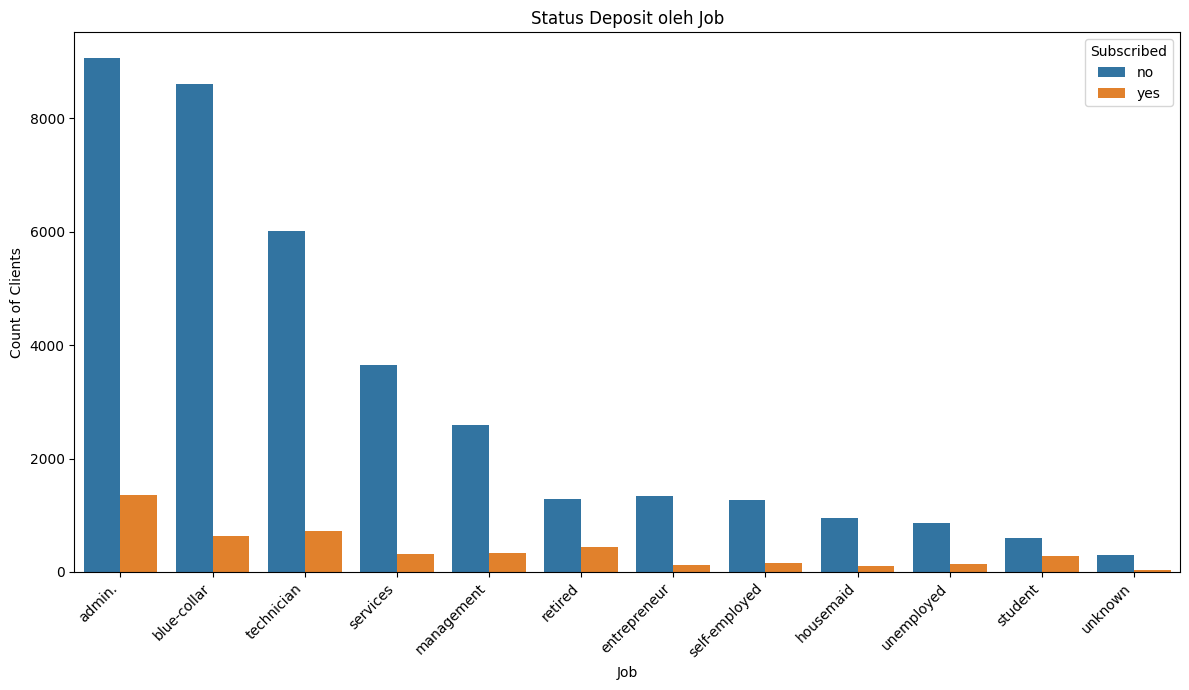


Analyzing Feature: 'marital'
----------------------------------------
Contingency Table:
y            no   yes
marital              
divorced   4132   476
married   22377  2531
single     9942  1620
unknown      68    12

Hasil Test Chi-Square Test:
  P-value: 2.0419046858987557e-26
  => Hubungan antara 'marital' dan deposit signifikan secara statistik.


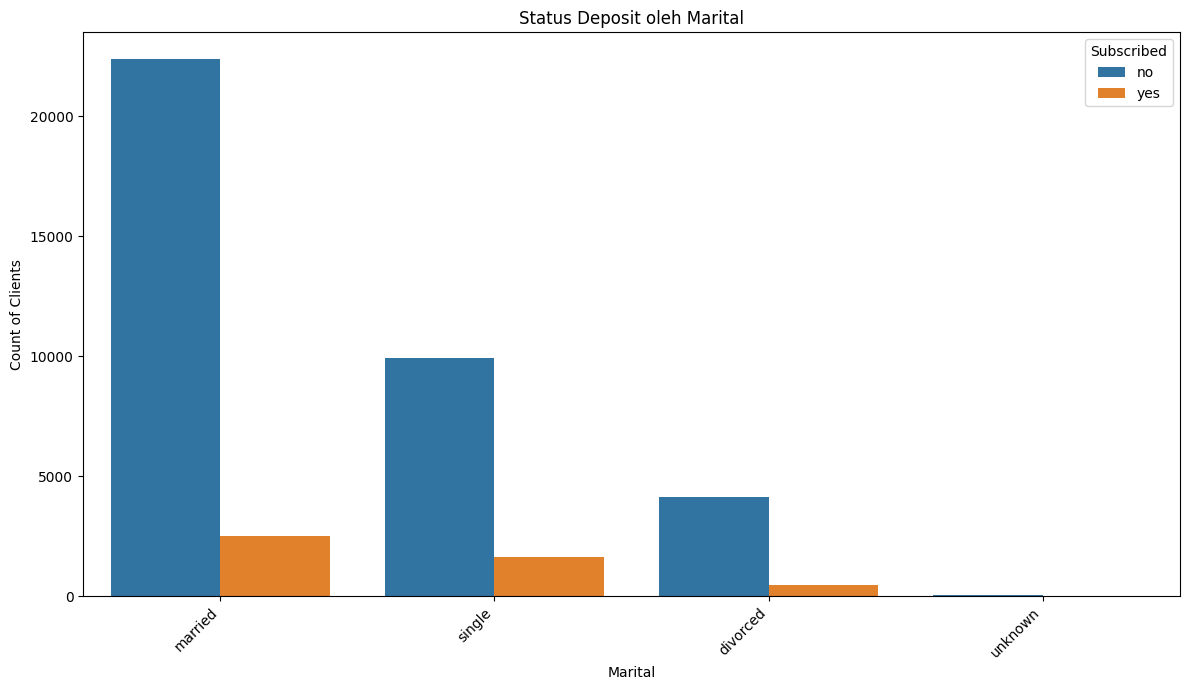


Analyzing Feature: 'education'
----------------------------------------
Contingency Table:
y                       no   yes
education                       
basic.4y              3748   428
basic.6y              2103   188
basic.9y              5572   473
high.school           8481  1031
illiterate              14     4
professional.course   4645   595
university.degree    10495  1669
unknown               1461   251

Hasil Test Chi-Square Test:
  P-value: 1.8311815980963358e-38
  => Hubungan antara 'education' dan deposit signifikan secara statistik.


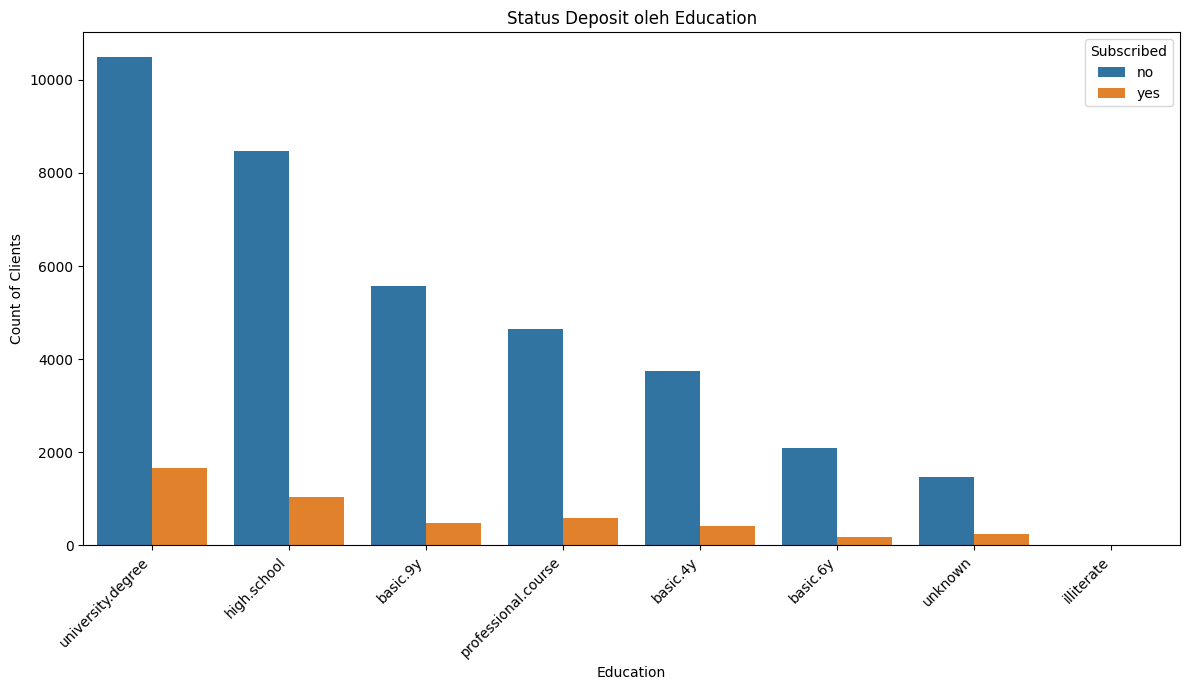


Analyzing Feature: 'default'
----------------------------------------
Contingency Table:
y           no   yes
default             
no       28381  4196
unknown   8135   443
yes          3     0

Hasil Test Chi-Square Test:
  P-value: 1.391348584737538e-88
  => Hubungan antara 'default' dan deposit signifikan secara statistik.


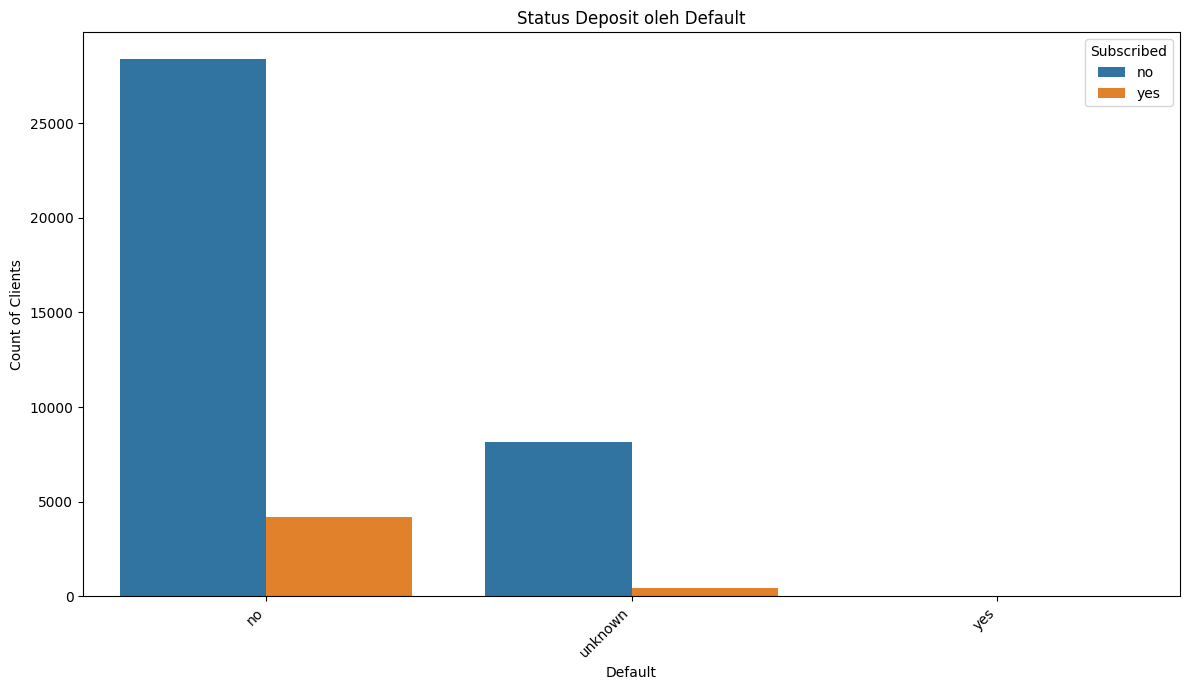


Analyzing Feature: 'housing'
----------------------------------------
Contingency Table:
y           no   yes
housing             
no       16590  2025
unknown    865   107
yes      19064  2507

Hasil Test Chi-Square Test:
  P-value: 0.06093621753619168
  => Tidak ada hubungan yang signifikan.


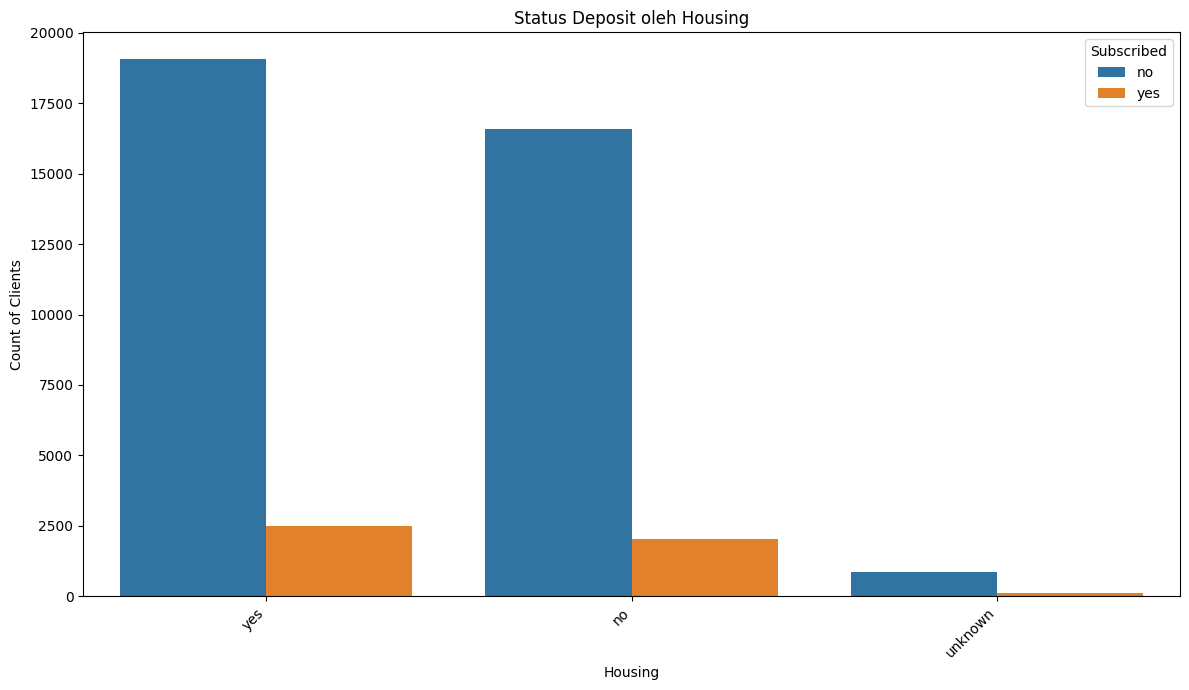


Analyzing Feature: 'loan'
----------------------------------------
Contingency Table:
y           no   yes
loan                
no       30089  3849
unknown    865   107
yes       5565   683

Hasil Test Chi-Square Test:
  P-value: 0.6204038571419973
  => Tidak ada hubungan yang signifikan.


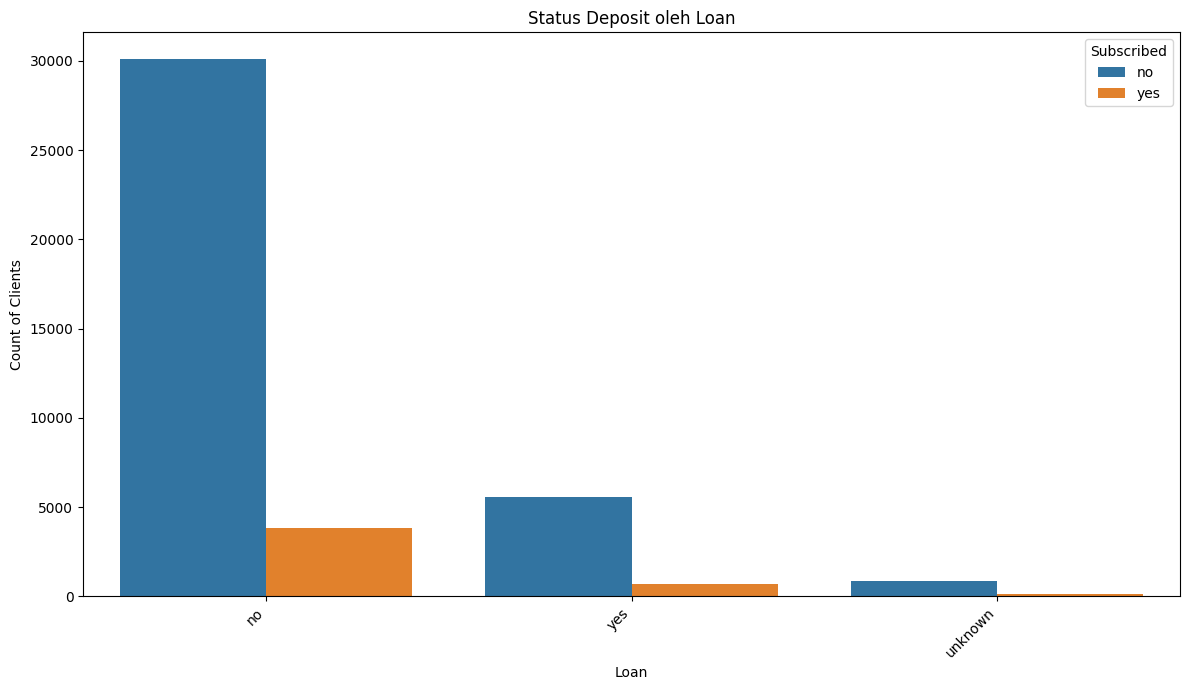


Analyzing Feature: 'contact'
----------------------------------------
Contingency Table:
y             no   yes
contact               
cellular   22276  3852
telephone  14243   787

Hasil Test Chi-Square Test:
  P-value: 2.555353775590759e-189
  => Hubungan antara 'contact' dan deposit signifikan secara statistik.


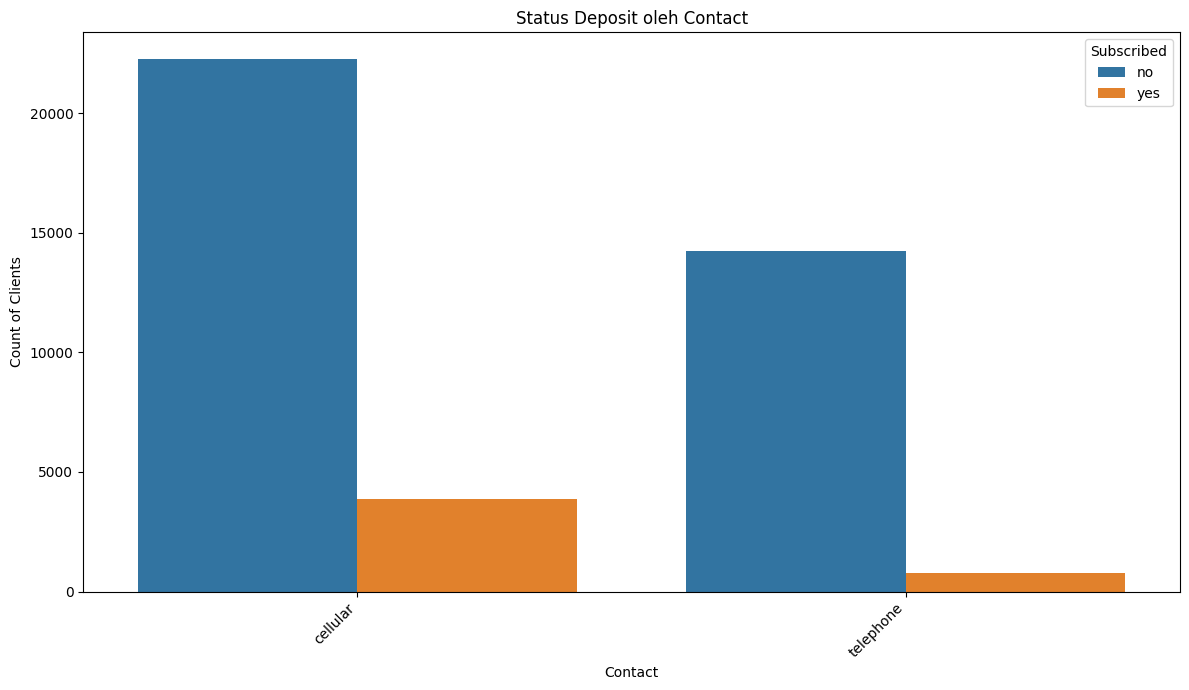


Analyzing Feature: 'month'
----------------------------------------
Contingency Table:
y         no  yes
month            
apr     2092  539
aug     5517  655
dec       93   89
jul     6517  648
jun     4755  559
mar      270  276
may    12875  886
nov     3684  416
oct      402  315
sep      314  256

Hasil Test Chi-Square Test:
  P-value: 0.0
  => Hubungan antara 'month' dan deposit signifikan secara statistik.


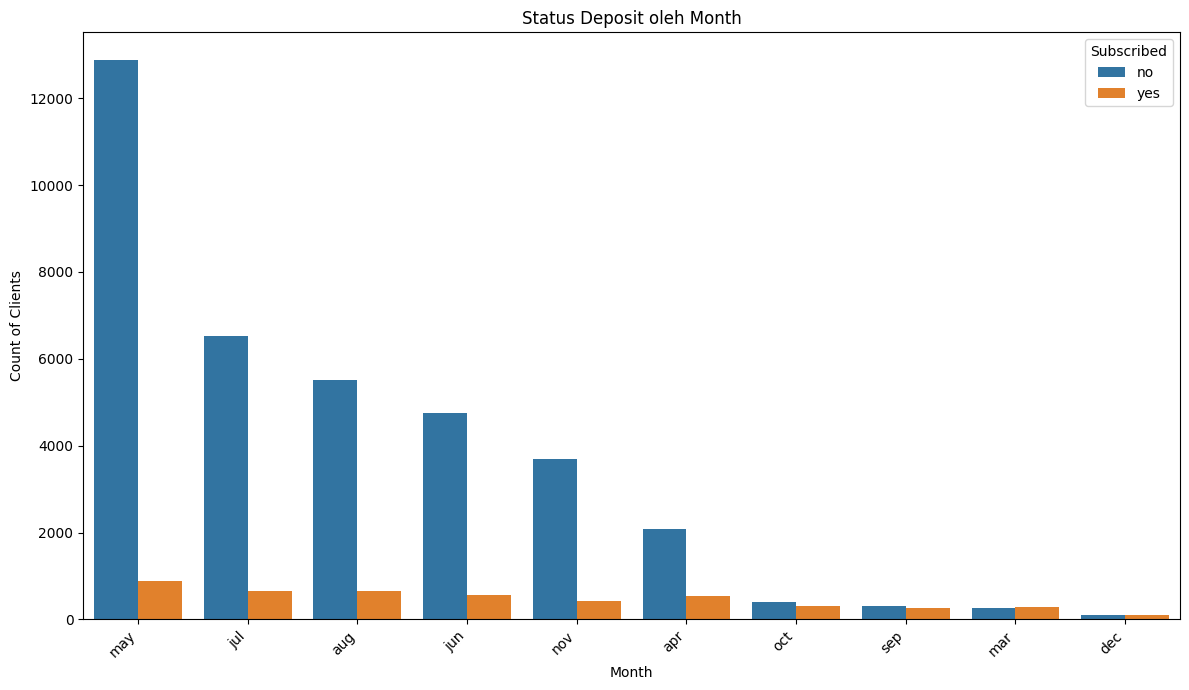


Analyzing Feature: 'day_of_week'
----------------------------------------
Contingency Table:
y              no   yes
day_of_week            
fri          6977   846
mon          7661   847
thu          7571  1044
tue          7130   953
wed          7180   949

Hasil Test Chi-Square Test:
  P-value: 3.100689566603485e-05
  => Hubungan antara 'day_of_week' dan deposit signifikan secara statistik.


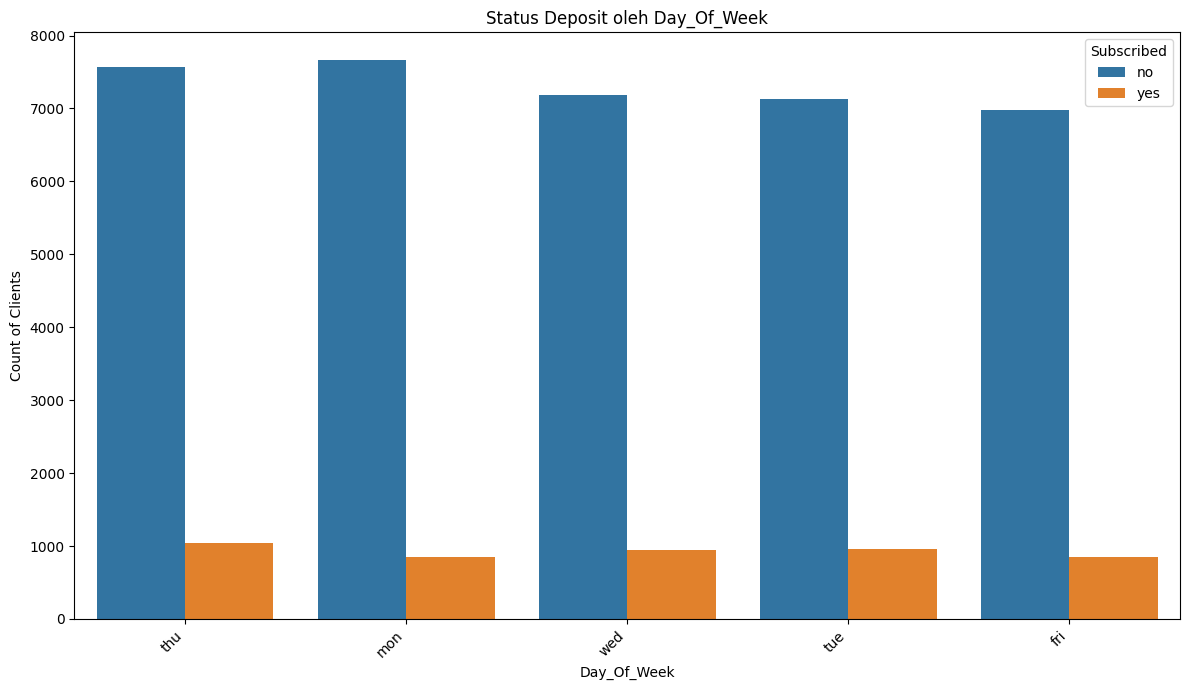


Analyzing Feature: 'poutcome'
----------------------------------------
Contingency Table:
y               no   yes
poutcome                
failure       3647   605
nonexistent  32393  3140
success        479   894

Hasil Test Chi-Square Test:
  P-value: 0.0
  => Hubungan antara 'poutcome' dan deposit signifikan secara statistik.


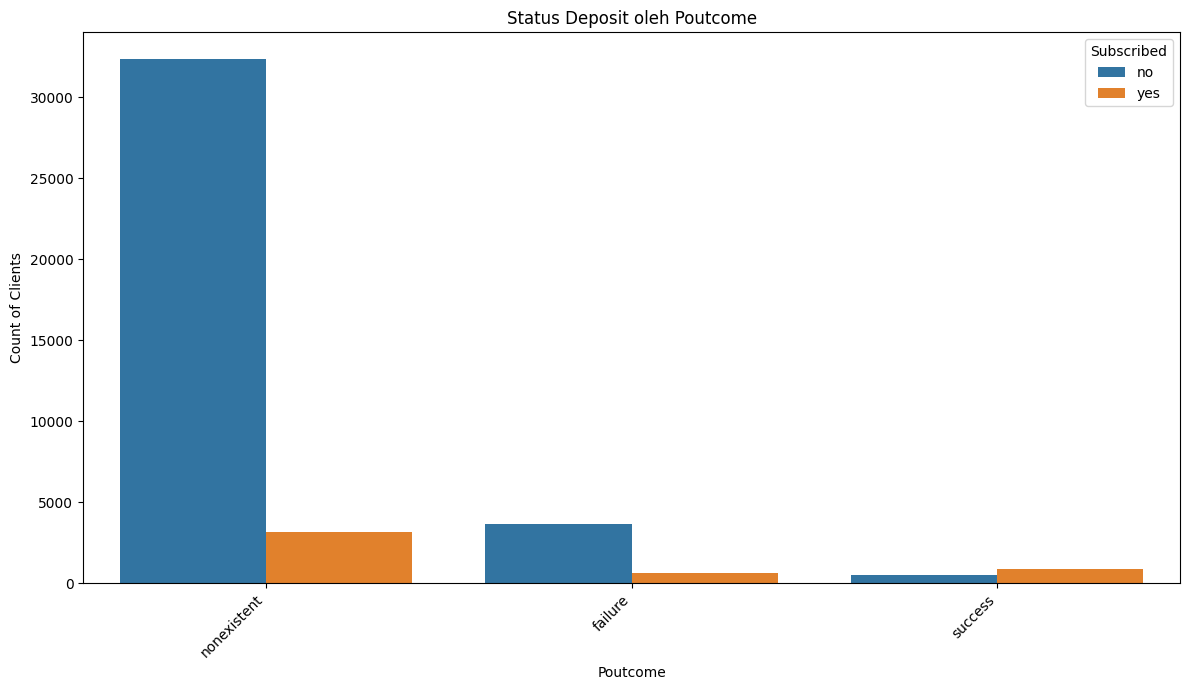

In [ ]:
# target variable
target = 'y'

data_kategorik = data_eda.select_dtypes(include=['object']).columns.tolist()
if target in data_kategorik:
    data_kategorik.remove(target)

print(f"Analisis Fitur Data Kategorik: {data_kategorik}")


# --- EDA untuk fitur kategorik vs. Target ('y') ---

print("\n--- Analisis Fitur Data Kategorik ---")
# Loop setiap fitur
for feature in data_kategorik:
    print(f"\nAnalyzing Feature: '{feature}'")
    print("-" * 40)

    # --- Analisis statistik (Chi-Square Test) ---> Karena kategorik vs kategorik
    contingency_table = pd.crosstab(data_eda[feature], data_eda[target])
    print("Contingency Table:")
    print(contingency_table)

    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"\nHasil Test Chi-Square Test:")
    print(f"  P-value: {p_value}")
    if p_value < 0.05:
        print(f"  => Hubungan antara '{feature}' dan deposit signifikan secara statistik.")
    else:
        print(f"  => Tidak ada hubungan yang signifikan.")

    # --- Visualisasi (Count Plot) ---
    plt.figure(figsize=(12, 7))

    sns.countplot(x=feature, hue=target, data=data_eda, order=data_eda[feature].value_counts().index)
    plt.title(f'Status Deposit oleh {feature.title()}')
    plt.xlabel(feature.title())
    plt.ylabel('Count of Clients')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Subscribed')
    plt.tight_layout()
    plt.show()

- Kesimpulan

| Peringkat | Fitur       | P-value                | Keterangan hubungan |
| --------- | ----------- | ---------------------- | ------------------- |
| 1         | education   | 0.0000                 | hubungan signifikan secara statistik         |
| 2         | default     | 0.0000                 | hubungan signifikan secara statistik         |
| 3         | month       | 0.0000                 | hubungan signifikan secara statistik         |
| 4         | poutcome    | 0.0000                 | hubungan signifikan secara statistik         |
| 5         | job         | 6.015043335144056e-222 | hubungan signifikan secara statistik         |
| 6         | contact     | 3.514996856027371e-136 | hubungan signifikan secara statistik         |
| 7         | housing     | 4.292068682347405e-135 | hubungan signifikan secara statistik         |
| 8         | loan        | 9.001774844949352e-135 | hubungan signifikan secara statistik         |
| 9         | marital     | 2.296196084779385e-24  | hubungan signifikan secara statistik         |
| 10        | day_of_week | 7.375544296934202e-05  | hubungan signifikan secara statistik    |


## Identifikasi Awal feature yang memiliki Korelasi paling tinggi terhadap Target

Column feature yang meliliki korelasi paling tinggi terhadap target :     

Uji korelasi methode spearman :    


*   duration :	p_val 0.348875
*   previous :	p_val 0.200886

Uji korelasi methode chi2_contingency :    

*   education :	p_val 0.0000
*   default :	p_val 0.0000
*   month :	p_val 0.0000
*   poutcome :	p_val 0.0000



Penjelasan hipotesis awal feature terhadap target yang memiliki korelasi tinggi :

1.   duration : jumlah lama waktu panggilan berpengaruh terhadap nasabah untuk mendepositkan uangnya. Berdasaarkan analisis kami variable ini kemungkinan adalah leakage yang "membocorkan" data kepada model

2.   previous : jumlah kontak/panggilan antara sales bank dengan nasabah berpengaruh terhadap nasabah mendepositkan uangnya, dan previous lebih berpengaruh dari pada campaign
3.   education : status pendididkan nasabah berpengaruh terhadap nasabah mendepositkan uangnya dikarenakan semakin tinggi tingkat pendidikan secara globalnya lebih besar juga gajinya tapi disini ada pengecualian dikarenakan ada profesional_course mungkin semakin mahir dibidangnya bisa lebih tinggi gaji yang diperoleh
4.   default : apakah nasabah pernah punya historis gagal bayar/kredit macet juga berpengaruh terhadap nasabah mendepositkan uangnya
5.   month : bulan juga berpengaruh terhadap nasabah mendepositkan uangnya dikarenakan mungkin ada bulan bulan tertentu nasabah tertarik mendepositkan uangnya, bisa jadi bulan pada waktu campaign berlansung



Berdasarkan hasil analisis dari uji kategorik dengan menggunakan Chi-Square pada data target maka dihasilkan beberapa observasi dari hipotesis, diantaranya adalah sebagai berikut:

1. **Status pendidikan, Sejarah Gagal Bayar, Bulan dan Hasil kampanye sebelumnya**

    Berdasarkan hasil analisis Chi-Square variable pendidikan menjadi salah satu variable yang memiliki kekuatan untuk memprediksi hasil apakah seseorang akan melakukan deposit atau tidak. Hal ini dapat dipahami karena masyarakat dengan tingkat pendidikan yang tinggi akan lebih memahami produk perbankan yang menguntungkan mereka. Hal ini sejalan dengan data eksternal yang menunjukan bahwa populasi terbesar masyarakat *Unbanked* adalah masyarakat yang berpendidikan lebih rendah.

    Variable lainnya yang memengaruhi setelah pendidikan adalah sejarah Default atau gagal bayar, dalam kasus ini diartikan pernah telat membayar loan sebelumnya. Dalam hal ini, orang dengan status gagal bayar memiliki beban finansial yang lebih besar sehingga hanya dapat melakukan manuver finansial yang terbatas. Orang dengan profile seperti ini bukan target utama bagi bank yang ingin nasabahnya melakukan deposit
    
    Bulan dan hasil kampanye sebelumnya dapat dijelaskan sebagai siklus. Seperti halnya di Indonesia, terdapat beberapa bulan dengan pengeluaran yang lebih besar bagi masyarakat Portugal, sebagai contoh menjelang tahun baru dan Natal, Thanksgiving dan liburan musim panas. Pada periode pengeluaran yang tinggi, masyarakat akan cenderung memprioritaskan keperluan finansialnya untuk hal yang sedang/akan datang dan bukan produk jangka panjang seperti Deposito
  
2. **Pekerjaan, Loan dan Housing**

    Pekerjaan memiliki hubungan yang signifikan juga dengan kemungkinan melakukan deposit. Pekerjaan seseorang secara langsung menentukan seberapa banyak disposable income yang bisa dikeluarkan oleh seseorang untuk kebutuhan investasi jangka panjang. Variable Loan dan Housing juga memiliki pengaruh signfikan, hal ini dapat dijelaskan sebagai beban finansial untuk seseorang. Semakin tinggi atau banyak beban finansial yang dimiliki seseoarang maka prioritas untuk produk finansial lainnya akan semakin berkurang.
3. **Status Pernikahan dan Hari dihubungi**

    Dua variable dengan faktor prediktif paling lemah adalah status pernikahan dan hari apa dihubungi. Status pernikahan dapat dijelaskan bahwa nasabah yang sudah menikah memiliki prioritas atau kapasitas finansial yang berbeda dengan nasabah yang belum menikah.

# Feature Engineering

In [ ]:
## feature engenering untuk eda
feature_engineering = data_eda.copy()
#beban pinjaman
feature_engineering['loan_burden'] = ((feature_engineering['housing'] == 'yes') & (feature_engineering['loan'] == 'yes')).astype(int) # nasabah yang memiliki 2 beban pinjaman
#stabilitas ekonomi
feature_engineering['economic_stability'] = feature_engineering['emp.var.rate'] + feature_engineering['cons.conf.idx'] ## Indikator stabilitas makro ekonomi pada suatu negara
#total panggilan sebelum dan sesudah kampanye
feature_engineering['contact_count'] = feature_engineering['previous'] + feature_engineering['campaign'] ## total jumlah panggilan atau interaksi dengan pelanggan, baik pada kampanye saat ini maupun kampanye sebelumnya
#grouping usia
bins = [16, 25, 35, 50, 98]  # perhatikan: batas bawah mulai dari 16 agar usia 17 masuk
labels = ["Muda", "Dewasa Muda", "Dewasa", "Lansia"]
feature_engineering["age_group"] = pd.cut(feature_engineering["age"], bins=bins, labels=labels, include_lowest=True).astype(str)# membuat group bedasarkan umur
#groping bulan menjadi season
month_to_season = {
    "mar":"spring","apr":"spring","may":"spring",
    "jun":"summer","jul":"summer","aug":"summer",
    "sep":"fall","oct":"fall","nov":"fall",
    "dec":"winter","jan":"winter","feb":"winter"
}
feature_engineering["season"] = feature_engineering["month"].map(month_to_season) # membuat season bedasarkan bulan
#mengelompokan selain value:999 yes dan 999:no dikarenakan di penjelasan datanya(kagle) value 999 : belum pernah di contact/dihubungi
feature_engineering['pdays_group'] = feature_engineering['pdays'].apply(lambda x: 'No' if x == 999 else 'Yes')


# untuk mengecek column yang ditambahkan
feature_engineering[['loan_burden', 'economic_stability', 'contact_count', 'age_group', 'season', 'pdays_group']]

,loan_burden,economic_stability,contact_count,age_group,season,pdays_group
0,0,-35.3,1,Lansia,spring,No
1,0,-35.3,1,Lansia,spring,No
2,0,-35.3,1,Dewasa,spring,No
3,0,-35.3,1,Dewasa,spring,No
4,0,-35.3,1,Lansia,spring,No
...,...,...,...,...,...,...
41153,0,-51.9,1,Lansia,fall,No
41154,0,-51.9,1,Dewasa,fall,No
41155,0,-51.9,2,Lansia,fall,No
41156,0,-51.9,1,Dewasa,fall,No


Feature engineering dalam dataset di atas diambil dari sumber tabel dibawah.
Penambahan feature "loan_burden", "economic_stability", "contact_count", "age_group", dan "season" dijelaskan lebih lanjut di tabel

| Fitur Baru               | Dasar Konseptual / Referensi                                                                                                                                                                                                                                                                                                                    | Penjelasan Kenapa Fitur Ini Relevan                                                                                                                                                                         |
| ------------------------ | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **`loan_burden`**        | Berdasarkan literatur tentang **financial stress dan over-indebtedness** — kombinasi antara *housing loan* dan *personal loan* menunjukkan beban keuangan tinggi yang dapat memengaruhi keputusan investasi.  <br>📖 *Brown, S., & Taylor, K. (2008). Household debt and financial stress: Evidence from British panel data. Economic Journal.* | Nasabah dengan dua pinjaman (rumah & pribadi) cenderung lebih berhati-hati dalam mengambil produk keuangan baru. Fitur ini bisa membantu model menangkap risiko atau sikap konservatif pelanggan.           |
| **`economic_stability`** | Berdasarkan indikator makroekonomi dari studi Bank Marketing original.  <br>📖 *Moro, S., Cortez, P., & Rita, P. (2014). A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, 62, 22–31.*                                                                                                             | Penelitian tersebut menunjukkan bahwa `emp.var.rate` dan `cons.conf.idx` merupakan indikator utama kondisi ekonomi. Menjumlahkannya menjadi indeks gabungan memberikan estimasi tingkat stabilitas ekonomi. |
| **`contact_count`**      | Konsep dari *customer engagement* dan *marketing exposure frequency*.  <br>📖 *Berger, J., & Milkman, K. L. (2012). What makes online content viral? Journal of Marketing Research.*                                                                                                                                                            | Jumlah total kontak (kampanye sekarang + sebelumnya) menggambarkan seberapa sering pelanggan dihubungi — terlalu sering bisa menimbulkan kelelahan, terlalu jarang bisa kurang efektif.                     |
| **`age_group`**          | Berdasarkan teori segmentasi demografis dalam marketing.  <br>📖 *Kotler, P., & Keller, K. L. (2016). Marketing Management (15th ed.).*                                                                                                                                                                                                         | Segmentasi umur digunakan untuk memahami perilaku konsumen yang berbeda menurut tahapan hidup (young adults, mature adults, seniors).                                                                       |
| **`season`**             | Berdasarkan analisis temporal yang sering digunakan dalam penelitian kampanye bank.  <br>📖 *Moro et al. (2014)* juga meneliti efek bulan terhadap keberhasilan kampanye.                                                                                                                                                                       | Mengelompokkan bulan menjadi musim membantu menangkap pola musiman (misal musim panas lebih aktif karena liburan).                                                                                          |
| **`pdays_group`**        | Berdasarkan definisi resmi dari variabel `pdays` di UCI dataset: `999` berarti *tidak pernah dihubungi sebelumnya*.  <br>📖 *UCI Bank Marketing Dataset Documentation.*                                                                                                                                                                         | Mengubahnya menjadi kategori `Yes/No` lebih intuitif dan mempermudah model memahami status kontak sebelumnya.                                                                                               |


- Mengecek ulang jumlah data kategorik dan numerik setelah feature engeneering

In [ ]:
len(feature_engineering.select_dtypes(include='object').columns) # jumlah column kategorik

14

In [ ]:
len(feature_engineering.select_dtypes(include='number').columns) # jumlah column numerik

13

Terdapat penambahan 3 fitur numerik dan 3 fitur kategorik ke dataset

# Prepocesing machine learning

## Menentukan jenis encode yang tepat terhadap datanya utuk machine learning

- load data kategorik

In [ ]:
data_kategorik = feature_engineering.select_dtypes(include='object')
data_kategorik

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y,age_group,season,pdays_group
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no,Lansia,spring,No
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no,Lansia,spring,No
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no,Dewasa,spring,No
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no,Dewasa,spring,No
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no,Lansia,spring,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41153,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes,Lansia,fall,No
41154,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no,Dewasa,fall,No
41155,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no,Lansia,fall,No
41156,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes,Dewasa,fall,No


- jumlah group percolumn kategorik

In [ ]:
data_kategorik.nunique().sort_values(ascending=False)

,0
job,12
month,10
education,8
day_of_week,5
marital,4
season,4
age_group,4
loan,3
default,3
housing,3


- mencari column kategorik yang memliki value unknown untuk menentukan jenis encode yang tepat

In [ ]:
column_unknown = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'age_group', 'season',
       'pdays_group']

# mencari column kategorik yang memliki value unknown
column_unknown = data_eda[unknown].isin(['unknown']).any()
column_unknown


,0
education,True
default,True
housing,True
loan,True


Mencari column('education','default', 'housing', 'loan'), fungsinya untuk mengidentifikasi value unknown pada  column yang memiliki value berurutan seperti 'month' untuk menentukan jenis encode yang tepat. Dikarenakan education memiliki value Unknown dan tidak memiliki urutan seperti pendidikan standard di Indonesia (SD sd Kuliah) maka Education masuk ke One-Hot Encoding

Pembagian encoding sesuai typenya masing masing :

1.   One Hot = job, martial, education, default, housing, loan, contact, puotcome, pdays_group
2.   Ordinal = month, day_of_week, age_group, season

--------------------------------------------------------------------------------
*   One Hot digunakan pada kolom kategorik untuk diubah menjadi numerik.
*   Ordinal digunakan untuk mengurutkan urutan tertentu.





## Menentukan jenis Scaling yang tepat terhadap datanya untuk machine learning

- Data Agreggation ( untuk melihat column mana yang memiliki skala yang tinggi)

In [ ]:
data_eda.select_dtypes(include='number').describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41158.000000,41158.000000,41158.000000,41158.000000,41158.000000,41158.000000,41158.000000,41158.000000,41158.000000,41158.000000
mean,40.021211,258.318456,2.567958,962.448831,0.173089,0.081389,93.575552,-40.503550,3.620724,5167.013572
std,10.420445,259.329193,2.770719,186.976414,0.495059,1.571017,0.578866,4.628335,1.734602,72.259057
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


hanya duration yang memiliki skala yang tinggi, dan dikarenakan memiliki outlier yang banyak dan bernilai extreme maka menggunakan Robust scaler untuk menanganinya

akan tetapi fitur duration akan di hapus dikarenakan  duration itu data leakage

alasan duration itu data leakage :
- memberi tahu jawaban terhadap target y karena semakin lama durasi panggilannya artinya nasabah tetarik
- target y  juga diketahui setelah panggilan berakhir

##identifikasi masalah untuk tahap machine learning

In [ ]:
data_eda['y'].value_counts().to_frame('Count').assign(
    Percentage=lambda x: round((x['Count'] / x['Count'].sum()) * 100, 2)
)


,Count,Percentage
y,,
no,36519,88.73
yes,4639,11.27


type masalah :


*   data imbalance : 0/no = 36,519 | 1/yes = 4639 'memerlukan **penanganan balancing'** untuk **identifikasi awal** paling tepat menggunakan **oversampling SMOTE** karena data masih dikategorikan tidak terlalu banyak tidak lebih dari 100rb supaya tidak menghilangkan pola dan informasi penting yang tersembunyi
*   biner classification : memiliki 2 group pada column target dan model yang tepat adalah **Classification(Original : LogisticRegression, DecisionTreeClassifier, KNeighborsClassifier, Neural Network, Naive Bayes, SVM (Support Vector Machine) | bagging : RandomForestClassifier |Boosting : LGBMClassifier, XGBClassifier, AdaBoostClassifier, GradientBoostingClassifier, CatBoostClassifier )**



## Save data untuk machine learning

- data_eda : data yang target "y"nya memiliki  value yes / no
- data_eda_copy : data yang target "y"nya yang sudah diubah menjadi yes : 1 | no: 0

In [ ]:
data_eda_copy

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41153,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41154,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41155,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41156,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


### Save data_ml

In [ ]:
data_eda_copy.to_csv('data_ml.csv', index=False)

### Save data_ml_drop ( baris yang memlikit value  unknown dihapus )

In [ ]:
import numpy as np

data_ml_drop = data_eda_copy.copy()

In [ ]:
unknown_counts = (data_ml_drop == 'unknown').sum()
unknown_counts.sort_values(ascending=False)

,0
default,8578
education,1712
housing,972
loan,972
job,328
marital,80
age,0
contact,0
month,0
day_of_week,0


- cek column yang memiliki value unknown degan value target/y no

In [ ]:
cols = ['job','marital','education','default','housing','loan','y']

# Mask baris: ada minimal satu 'unknown' di kolom kategorikal
mask_unknown = (data_ml_drop[cols] == 'unknown').any(axis=1)

# Mask target y=1
mask_y = (data_ml_drop['y'] ==0)  # kalau target string: data_ml_drop['y'] == 'no'

# Filter baris
filtered_data = data_ml_drop[mask_unknown & mask_y]

filtered_data[['job','marital','education','default','housing','loan','y']]


,job,marital,education,default,housing,loan,y
1,services,married,high.school,unknown,no,no,0
5,services,married,basic.9y,unknown,no,no,0
7,blue-collar,married,unknown,unknown,no,no,0
10,blue-collar,married,unknown,unknown,no,no,0
15,retired,married,basic.9y,unknown,yes,yes,0
...,...,...,...,...,...,...,...
41079,technician,married,unknown,no,yes,no,0
41088,technician,married,unknown,no,yes,no,0
41090,admin.,married,unknown,no,no,no,0
41105,technician,married,unknown,no,yes,no,0


- menghapus data yang memillki value unknown dan target/y 0

In [ ]:
cols = ['job','marital','education','default','housing','loan']

data_ml_drop = data_ml_drop[
    ~((data_ml_drop[cols].apply(lambda row: any(row == 'unknown'), axis=1)) & (data_ml_drop['y'] == 0))
]


- mengecek ulang

In [ ]:
cols = ['job','marital','education','default','housing','loan','y']

# Mask baris: ada minimal satu 'unknown' di kolom kategorikal
mask_unknown = (data_ml_drop[cols] == 'unknown').any(axis=1)

# Mask target y=1
mask_y = (data_ml_drop['y'] ==0)  # kalau target string: data_ml_drop['y'] == 'no'

# Filter baris
filtered_data = data_ml_drop[mask_unknown & mask_y]

filtered_data[['job','marital','education','default','housing','loan','y']]


,job,marital,education,default,housing,loan,y


In [ ]:
data_ml_drop.reset_index( inplace=True)
data_ml_drop

,level_0,index,age,job,marital,education,default,housing,loan,contact,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,0,56,housemaid,married,basic.4y,no,no,no,telephone,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,1,2,37,services,married,high.school,no,yes,no,telephone,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,2,3,40,admin.,married,basic.6y,no,no,no,telephone,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,3,4,56,services,married,high.school,no,no,yes,telephone,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,4,6,59,admin.,married,professional.course,no,no,no,telephone,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31254,31254,41153,73,retired,married,professional.course,no,yes,no,cellular,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
31255,31255,41154,46,blue-collar,married,professional.course,no,no,no,cellular,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
31256,31256,41155,56,retired,married,university.degree,no,yes,no,cellular,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
31257,31257,41156,44,technician,married,professional.course,no,no,no,cellular,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


- save data

In [ ]:
data_ml_drop.to_csv('data_ml_drop.csv', index=False)

# Machine Learning

## Modeling dengan original/base model

### Mencari model terbaik dari ke 6 model dengan data ( data_ml dan data_ml_drop )

Menggunakan model original yaitu :

- Logistic Regression
- Decision Tree Classifier
- KNeighbors Classifier
- Neural Network Multi-Layer Perceptron Classifier
Ini adalah bentuk dari feedforward neural network (yaitu jaringan saraf yang paling dasar).
- Naive_bayes
- SVM (Support Vector Machine)


Untuk tahap awal, kami menggunakan keenam model di atas untuk mencari mana model terbaik untuk data ini dikarenakan base model lebih cepat dari pada baging dan boosting dikarena base model hanya membangun satu model sederhana (misal 1 pohon)

dan alasan kami menggunakan 6  model sekaligus untuk mempersingkat waktu mana model terbaik untuk data ini serta menguji coba kepada ke2 data yaitu data_ml ( data yang tidak dihapus value unknown ) dan data_ml_drop ( data yang dihapus value unknown dengan target no/0 )

| Base Model                    | Kelebihan                      | Sumber    |
| ----------------------------- | ------------------------------ |-----------|
| Logistic Regression           | Mudah diimplementasikan, diinterpretasi, dan efisien      | Velu, 2021 (https://media.neliti.com/media/publications/429213-application-of-logistic-regression-model-7bd9b3fb.pdf)
| Decision Tree Classifier      | Membantu pengambilan keputusan| Velu, 2021 (https://media.neliti.com/media/publications/429213-application-of-logistic-regression-model-7bd9b3fb.pdf)
| KNeighbors Classifier         | Mudah digunakan, dapat bekerja untuk klasifikasi maupun regresi      | Bansal, dkk., 2022 (https://www.sciencedirect.com/science/article/pii/S2772662222000261)
| Naive Bayes                   | Efektif untuk case dengan fitur yang banyak | https://www.geeksforgeeks.org/machine-learning/naive-bayes-classifiers/
| SVM                           | Cocok untuk klasifikasi biner               | https://www.geeksforgeeks.org/machine-learning/support-vector-machine-algorithm/
                              


- data_ml ( data yang tidak dihapus value unknown )

In [ ]:
import pandas as pd
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE


data_ml = pd.read_csv('data_ml.csv')

# feature engeneering
def feature_engineering(data_ml):
    data_ml = data_ml.copy() # menggunakan .copy() agar lebih aman untuk manipulasi data selanjutnya
    data_ml_drop = data_ml_drop.drop(columns=[col for col in ['index', 'level_0'] if col in data_ml_drop.columns]) # Hapus kolom index yang mungkin tertinggal dalam feature_engineering()
    data_ml['loan_burden'] = ((data_ml['housing']=='yes') & (data_ml['loan']=='yes')).astype(int)# nasabah yang memiliki 2 beban pinjaman
    data_ml['economic_stability'] = data_ml['emp.var.rate'] + data_ml['cons.conf.idx']# Indikator stabilitas makro ekonomi pada suatu negara
    data_ml['contact_count'] = data_ml['previous'] + data_ml['campaign'] #total panggilan sebelum dan sesudah kampanye

    # Age group
    bins = [16, 25, 35, 50, 98]# perhatikan: batas bawah mulai dari 16 agar usia 17 masuk
    labels = ["Muda","Dewasa Muda","Dewasa","Lansia"]
    data_ml['age_group'] = pd.cut(data_ml['age'], bins=bins, labels=labels, include_lowest=True).astype(str)# membuat group bedasarkan umur

    # Month → season
    month_to_season = {
        "mar":"spring","apr":"spring","may":"spring",
        "jun":"summer","jul":"summer","aug":"summer",
        "sep":"fall","oct":"fall","nov":"fall",
        "dec":"winter","jan":"winter","feb":"winter"
    }
    data_ml['season'] = data_ml['month'].str.lower().map(month_to_season) # membuat grop bedasarkan season

    # pdays_group
    data_ml['pdays_group'] = data_ml['pdays'].apply(lambda x: 'No' if x==999 else 'Yes')#mengelompokan selain value:999 yes dan 999:no dikarenakan di penjelasan datanya(kagle) value 999 : belum pernah di contact/dihubungi

    return data_ml


# Kolom OneHot encode
onehot_cols = ['job','marital','education','default','housing','loan','contact','poutcome','pdays_group']
# Kolom ordinal encode
ordinal_cols = ['age_group','season','month','day_of_week']

# ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'), onehot_cols),
    ('ordinal', OrdinalEncoder(), ordinal_cols)
], remainder='passthrough')

## kandidat model
models = {
    'Logistic Regression': LogisticRegression(), # random_state tidak perlu untuk 'liblinear'
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),   # tidak perlu random_state
    'Neural Network' : MLPClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(random_state=42)
}

# Pisahkan fitur dan target
X = data_ml.drop(['y','duration'], axis=1)
y = data_ml['y']

# Split data jadi Train (80%) dan Test (20%) → Stratified
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=2020
)

# Split lagi TrainVal menjadi Training (60%) dan Validation (20%)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.25, stratify=y_trainval, random_state=2020
) # 0.25 itu didapat dari 20% dibagi 80% (data training)

model_results = []

for name, model in models.items():
    pipeline = Pipeline([
        ('feature_eng', FunctionTransformer(feature_engineering)),  # FE
        ('preprocessor', preprocessor),                             # OneHot + Ordinal + Scaling
        ('smote', SMOTE(random_state=42)),                          # hanya numeric
        ('classifier', model)
    ])

    pipeline.fit(X_train, y_train)
    y_val_pred = pipeline.predict(X_val)

    acc = accuracy_score(y_val, y_val_pred)
    rec = recall_score(y_val, y_val_pred)
    prec = precision_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)

    model_results.append({
        'Model': name,
        'Accuracy': acc,
        'Recall': rec,
        'Precision': prec,
        'F1': f1
    })


# Tampilkan hasil perbandingan
results_df = pd.DataFrame(model_results)
result_df = results_df.sort_values(by='F1', ascending=False)
result_df

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Accuracy,Recall,Precision,F1
4,Naive Bayes,0.813168,0.589440,0.321009,0.415653
0,Logistic Regression,0.746113,0.693966,0.262857,0.381291
5,SVM,0.723518,0.724138,0.249629,0.371271
2,KNN,0.705296,0.618534,0.216931,0.321209
1,Decision Tree,0.830539,0.329741,0.283596,0.304933
3,Neural Network,0.358722,0.903017,0.139041,0.240978


- data_ml_drop ( data yang dihapus value unknown dengan target no/0 )

In [ ]:
import pandas as pd
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE


data_ml_drop = pd.read_csv('data_ml_drop.csv')

# feature engeneering
def feature_engineering(data_ml_drop):
    data_ml_drop = data_ml_drop.copy() # menggunakan .copy() agar lebih aman untuk manipulasi data selanjutnya
    data_ml_drop = data_ml_drop.drop(columns=[col for col in ['index', 'level_0'] if col in data_ml_drop.columns]) # Hapus kolom index yang mungkin tertinggal dalam feature_engineering()
    data_ml_drop['loan_burden'] = ((data_ml_drop['housing']=='yes') & (data_ml_drop['loan']=='yes')).astype(int)# nasabah yang memiliki 2 beban pinjaman
    data_ml_drop['economic_stability'] = data_ml_drop['emp.var.rate'] + data_ml_drop['cons.conf.idx']# Indikator stabilitas makro ekonomi pada suatu negara
    data_ml_drop['contact_count'] = data_ml_drop['previous'] + data_ml_drop['campaign'] #total panggilan sebelum dan sesudah kampanye

    # Age group
    bins = [16, 25, 35, 50, 98]# perhatikan: batas bawah mulai dari 16 agar usia 17 masuk
    labels = ["Muda","Dewasa Muda","Dewasa","Lansia"]
    data_ml_drop['age_group'] = pd.cut(data_ml_drop['age'], bins=bins, labels=labels, include_lowest=True).astype(str)# membuat group bedasarkan umur

    # Month → season
    month_to_season = {
        "mar":"spring","apr":"spring","may":"spring",
        "jun":"summer","jul":"summer","aug":"summer",
        "sep":"fall","oct":"fall","nov":"fall",
        "dec":"winter","jan":"winter","feb":"winter"
    }
    data_ml_drop['season'] = data_ml_drop['month'].str.lower().map(month_to_season) # membuat grop bedasarkan season

    # pdays_group
    data_ml_drop['pdays_group'] = data_ml_drop['pdays'].apply(lambda x: 'No' if x==999 else 'Yes')#mengelompokan selain value:999 yes dan 999:no dikarenakan di penjelasan datanya(kagle) value 999 : belum pernah di contact/dihubungi

    return data_ml_drop


# Kolom OneHot encode
onehot_cols = ['job','marital','education','default','housing','loan','contact','poutcome','pdays_group']
# Kolom ordinal encode
ordinal_cols = ['age_group','season','month','day_of_week']

# ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'), onehot_cols),
    ('ordinal', OrdinalEncoder(), ordinal_cols)
], remainder='passthrough')

## kandidat model
models = {
    'Logistic Regression': LogisticRegression(), # random_state tidak perlu untuk 'liblinear'
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),   # tidak perlu random_state
    'Neural Network' : MLPClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(random_state=42)
}

# Pisahkan fitur dan target
X = data_ml_drop.drop(['y','duration'], axis=1)
y = data_ml_drop['y']

# Split data jadi Train (80%) dan Test (20%) → Stratified
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=2020
)

# Split lagi TrainVal menjadi Training (60%) dan Validation (20%)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.25, stratify=y_trainval, random_state=2020
) # 0.25 itu didapat dari 20% dibagi 80% (data training)

model_results = []

for name, model in models.items():
    pipeline = Pipeline([
        ('feature_eng', FunctionTransformer(feature_engineering)),  # FE
        ('preprocessor', preprocessor),                             # OneHot + Ordinal + Scaling
        ('smote', SMOTE(random_state=42)),                          # hanya numeric
        ('classifier', model)
    ])

    pipeline.fit(X_train, y_train)
    y_val_pred = pipeline.predict(X_val)

    acc = accuracy_score(y_val, y_val_pred)
    rec = recall_score(y_val, y_val_pred)
    prec = precision_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)

    model_results.append({
        'Model': name,
        'Accuracy': acc,
        'Recall': rec,
        'Precision': prec,
        'F1': f1
    })


# Tampilkan hasil perbandingan
results_df = pd.DataFrame(model_results)
result_df = results_df.sort_values(by='F1', ascending=False)
result_df

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Accuracy,Recall,Precision,F1
1,Decision Tree,0.821017,0.469828,0.410160,0.437971
0,Logistic Regression,0.736564,0.637931,0.311088,0.418227
4,Naive Bayes,0.702975,0.678879,0.287803,0.404235
2,KNN,0.724248,0.608836,0.293354,0.395936
5,SVM,0.725048,0.586207,0.289516,0.387602
3,Neural Network,0.415707,0.899784,0.189989,0.313733


Kesimpulan

- Model dengan score tertinggi menggunakan data_ml_drop (value unknown dengan target 0 dihapus) dikarenakan mengurangi jumlah imbalace/ketidak seimbangan antara 0 dan 1 jadi resampling bekerja dengan lebih baik tidak terlalu menambahakan banyak data sintestis
- Selanjutnya pada cross validation akan mengunakan data_ml_drop

### Cross validation 2 model terbaik dengan data_ml_drop

In [ ]:
import pandas as pd
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# Load data
data_ml_drop = pd.read_csv('data_ml_drop.csv')

# feature engeneering
def feature_engineering(data_ml_drop):
    data_ml_drop = data_ml_drop.copy() # menggunakan .copy() agar lebih aman untuk manipulasi data selanjutnya
    data_ml_drop = data_ml_drop.drop(columns=[col for col in ['index', 'level_0'] if col in data_ml_drop.columns]) # Hapus kolom index yang mungkin tertinggal dalam feature_engineering()
    data_ml_drop['loan_burden'] = ((data_ml_drop['housing']=='yes') & (data_ml_drop['loan']=='yes')).astype(int)# nasabah yang memiliki 2 beban pinjaman
    data_ml_drop['economic_stability'] = data_ml_drop['emp.var.rate'] + data_ml_drop['cons.conf.idx']# Indikator stabilitas makro ekonomi pada suatu negara
    data_ml_drop['contact_count'] = data_ml_drop['previous'] + data_ml_drop['campaign'] #total panggilan sebelum dan sesudah kampanye

    # Age group
    bins = [16, 25, 35, 50, 98]# perhatikan: batas bawah mulai dari 16 agar usia 17 masuk
    labels = ["Muda","Dewasa Muda","Dewasa","Lansia"]
    data_ml_drop['age_group'] = pd.cut(data_ml_drop['age'], bins=bins, labels=labels, include_lowest=True).astype(str)# membuat group bedasarkan umur

    # Month → season
    month_to_season = {
        "mar":"spring","apr":"spring","may":"spring",
        "jun":"summer","jul":"summer","aug":"summer",
        "sep":"fall","oct":"fall","nov":"fall",
        "dec":"winter","jan":"winter","feb":"winter"
    }
    data_ml_drop['season'] = data_ml_drop['month'].str.lower().map(month_to_season) # membuat grop bedasarkan season

    # pdays_group
    data_ml_drop['pdays_group'] = data_ml_drop['pdays'].apply(lambda x: 'No' if x==999 else 'Yes')#mengelompokan selain value:999 yes dan 999:no dikarenakan di penjelasan datanya(kagle) value 999 : belum pernah di contact/dihubungi

    return data_ml_drop



# Kolom OneHot encode
onehot_cols = ['job','marital','education','default','housing','loan','contact','poutcome','pdays_group']
# Kolom ordinal encode
ordinal_cols = ['age_group','season','month','day_of_week']

# ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'), onehot_cols),
    ('ordinal', OrdinalEncoder(), ordinal_cols),
], remainder='passthrough')


# Pisahkan fitur dan target
X = data_ml_drop.drop(['y', 'duration'], axis=1)
y = data_ml_drop['y']

# Split data jadi Train (80%) dan Test (20%) → Stratified
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=2020
)

## kandidat model
models = {
    'Logistic Regression': LogisticRegression(), # random_state tidak perlu untuk 'liblinear'
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model_results = []

for name, model in models.items():
    # pipeline keseluruhan/final
    pipeline = Pipeline([
        ('feature_eng', FunctionTransformer(feature_engineering)),# feature engenering
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])

    f1_scores = cross_val_score(pipeline, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)

    model_results.append({
        'Model': name,
        'Fold-1': f1_scores[0],
        'Fold-2': f1_scores[1],
        'Fold-3': f1_scores[2],
        'Fold-4': f1_scores[3],
        'Fold-5': f1_scores[4],
        'Mean f1': f1_scores.mean(),
        'Std f1': f1_scores.std()

    })


result_df = pd.DataFrame(model_results).T
result_df

,0,1
Model,Logistic Regression,Decision Tree
Fold-1,0.446396,0.416883
Fold-2,0.400347,0.419974
Fold-3,0.427833,0.410359
Fold-4,0.441068,0.432923
Fold-5,0.436347,0.421656
Mean f1,0.430398,0.420359
Std f1,0.016216,0.007373


Kesimpulan

- model Decision tree yang paling stabil dibanding logistic regression akan tetapi kami akan mencoba mengecek pada train dan testnya untuk mengidentifikasi apakah model over fitting pada kedua model terbaik

### Mengecek hasil train dan test apakah over fitting pada best model menggunakan data_ml_drop

- DecisionTreeClassifier

In [ ]:
import pandas as pd
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE


data_ml_drop = pd.read_csv('data_ml_drop.csv')

# feature engeneering
def feature_engineering(data_ml_drop):
    data_ml_drop = data_ml_drop.copy() # menggunakan .copy() agar lebih aman untuk manipulasi data selanjutnya
    data_ml_drop = data_ml_drop.drop(columns=[col for col in ['index', 'level_0'] if col in data_ml_drop.columns]) # Hapus kolom index yang mungkin tertinggal dalam feature_engineering()
    data_ml_drop['loan_burden'] = ((data_ml_drop['housing']=='yes') & (data_ml_drop['loan']=='yes')).astype(int)# nasabah yang memiliki 2 beban pinjaman
    data_ml_drop['economic_stability'] = data_ml_drop['emp.var.rate'] + data_ml_drop['cons.conf.idx']# Indikator stabilitas makro ekonomi pada suatu negara
    data_ml_drop['contact_count'] = data_ml_drop['previous'] + data_ml_drop['campaign'] #total panggilan sebelum dan sesudah kampanye

    # Age group
    bins = [16, 25, 35, 50, 98]# perhatikan: batas bawah mulai dari 16 agar usia 17 masuk
    labels = ["Muda","Dewasa Muda","Dewasa","Lansia"]
    data_ml_drop['age_group'] = pd.cut(data_ml_drop['age'], bins=bins, labels=labels, include_lowest=True).astype(str)# membuat group bedasarkan umur

    # Month → season
    month_to_season = {
        "mar":"spring","apr":"spring","may":"spring",
        "jun":"summer","jul":"summer","aug":"summer",
        "sep":"fall","oct":"fall","nov":"fall",
        "dec":"winter","jan":"winter","feb":"winter"
    }
    data_ml_drop['season'] = data_ml_drop['month'].str.lower().map(month_to_season) # membuat grop bedasarkan season

    # pdays_group
    data_ml_drop['pdays_group'] = data_ml_drop['pdays'].apply(lambda x: 'No' if x==999 else 'Yes')#mengelompokan selain value:999 yes dan 999:no dikarenakan di penjelasan datanya(kagle) value 999 : belum pernah di contact/dihubungi

    return data_ml_drop


# Kolom OneHot encode
onehot_cols = ['job','marital','education','default','housing','loan','contact','poutcome','pdays_group']
# Kolom ordinal encode
ordinal_cols = ['age_group','season','month','day_of_week']

# ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'), onehot_cols),
    ('ordinal', OrdinalEncoder(), ordinal_cols)
], remainder='passthrough')


# Pisahkan fitur dan target
X = data_ml_drop.drop(['y','duration'], axis=1)
y = data_ml_drop['y']

# Split data jadi Train (80%) dan Test (20%) → Stratified
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=2020
)

model_results = []

pipeline = Pipeline([
    ('feature_eng', FunctionTransformer(feature_engineering)),
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42))
])


pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

acc_train = accuracy_score(y_train, y_train_pred)
rec_train = recall_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

acc_test = accuracy_score(y_test, y_test_pred)
rec_test = recall_score(y_test, y_test_pred)
prec_test = precision_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

model_results.append({
    'Model': 'Decision Tree',
    'Accuracy (Train)': acc_train,
    'Accuracy (Test)': acc_test,
    'Recall (Train)': rec_train,
    'Recall (Test)': rec_test,
    'Precision (Train)': prec_train,
    'Precision (Test)': prec_test,
    'F1 (Train)': f1_train,
    'F1 (Test)': f1_test
})

# Tampilkan hasil perbandingan
results_data = pd.DataFrame(model_results).T
results_data

,0
Model,Decision Tree
Accuracy (Train),1.0
Accuracy (Test),0.826775
Recall (Train),1.0
Recall (Test),0.476293
Precision (Train),1.0
Precision (Test),0.425409
F1 (Train),1.0
F1 (Test),0.449415


- Logistic Regression

In [ ]:
import pandas as pd
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

data_ml_drop = pd.read_csv('data_ml_drop.csv')

# feature engeneering
def feature_engineering(data_ml_drop):
    data_ml_drop = data_ml_drop.copy() # menggunakan .copy() agar lebih aman untuk manipulasi data selanjutnya
    data_ml_drop = data_ml_drop.drop(columns=[col for col in ['index', 'level_0'] if col in data_ml_drop.columns]) # Hapus kolom index yang mungkin tertinggal dalam feature_engineering()
    data_ml_drop['loan_burden'] = ((data_ml_drop['housing']=='yes') & (data_ml_drop['loan']=='yes')).astype(int)# nasabah yang memiliki 2 beban pinjaman
    data_ml_drop['economic_stability'] = data_ml_drop['emp.var.rate'] + data_ml_drop['cons.conf.idx']# Indikator stabilitas makro ekonomi pada suatu negara
    data_ml_drop['contact_count'] = data_ml_drop['previous'] + data_ml_drop['campaign'] #total panggilan sebelum dan sesudah kampanye

    # Age group
    bins = [16, 25, 35, 50, 98]# perhatikan: batas bawah mulai dari 16 agar usia 17 masuk
    labels = ["Muda","Dewasa Muda","Dewasa","Lansia"]
    data_ml_drop['age_group'] = pd.cut(data_ml_drop['age'], bins=bins, labels=labels, include_lowest=True).astype(str)# membuat group bedasarkan umur

    # Month → season
    month_to_season = {
        "mar":"spring","apr":"spring","may":"spring",
        "jun":"summer","jul":"summer","aug":"summer",
        "sep":"fall","oct":"fall","nov":"fall",
        "dec":"winter","jan":"winter","feb":"winter"
    }
    data_ml_drop['season'] = data_ml_drop['month'].str.lower().map(month_to_season) # membuat grop bedasarkan season

    # pdays_group
    data_ml_drop['pdays_group'] = data_ml_drop['pdays'].apply(lambda x: 'No' if x==999 else 'Yes')#mengelompokan selain value:999 yes dan 999:no dikarenakan di penjelasan datanya(kagle) value 999 : belum pernah di contact/dihubungi

    return data_ml_drop


# Kolom OneHot encode
onehot_cols = ['job','marital','education','default','housing','loan','contact','poutcome','pdays_group']
# Kolom ordinal encode
ordinal_cols = ['age_group','season','month','day_of_week']

# ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'), onehot_cols),
    ('ordinal', OrdinalEncoder(), ordinal_cols)
], remainder='passthrough')


# Pisahkan fitur dan target
X = data_ml_drop.drop(['y','duration'], axis=1)
y = data_ml_drop['y']

# Split data jadi Train (80%) dan Test (20%) → Stratified
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=2020
)

model_results = []

# Karena kamu hanya pakai LogisticRegression, models dict dihapus
pipeline = Pipeline([
    ('feature_eng', FunctionTransformer(feature_engineering)),
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('Logistic Regression', LogisticRegression())# random_state tidak perlu untuk 'liblinear'
])


pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

acc_train = accuracy_score(y_train, y_train_pred)
rec_train = recall_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

acc_test = accuracy_score(y_test, y_test_pred)
rec_test = recall_score(y_test, y_test_pred)
prec_test = precision_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

model_results.append({
    'Model': 'Logistic Regression',
    'Accuracy (Train)': acc_train,
    'Accuracy (Test)': acc_test,
    'Recall (Train)': rec_train,
    'Recall (Test)': rec_test,
    'Precision (Train)': prec_train,
    'Precision (Test)': prec_test,
    'F1 (Train)': f1_train,
    'F1 (Test)': f1_test
})

# Tampilkan hasil perbandingan
results_data = pd.DataFrame(model_results).T
results_data

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,0
Model,Logistic Regression
Accuracy (Train),0.729156
Accuracy (Test),0.747441
Recall (Train),0.656427
Recall (Test),0.696121
Precision (Train),0.307033
Precision (Test),0.332476
F1 (Train),0.418377
F1 (Test),0.450017


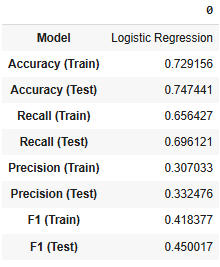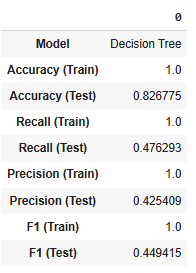

Kesimpulan
- Walaupun saat cross validation descission tree lebih stabil std_scorenya 0.007373 dibanding logistic regression std_score 0.016216 tapi ketika dicek dengan data train dan tes scorenya pada ke2 model terbaik, logistic regresion lebih baik dibanding decision tree dikarenakan decision tree score pada trainnya terlalau belajar sehingga ada kemungkinan overfitting.

- Tahap selanjutanya untuk mencari resampling terbaik( undersampler, smote & tomek link)  adalah model terbaik( logistic regression)

### Mencari resampling terbaik pada best model(logistic regression) dengan data_ml_drop

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

data_ml_drop = pd.read_csv('data_ml_drop.csv')

# feature engeneering
def feature_engineering(data_ml_drop):
    data_ml_drop = data_ml_drop.copy() # menggunakan .copy() agar lebih aman untuk manipulasi data selanjutnya
    data_ml_drop = data_ml_drop.drop(columns=[col for col in ['index', 'level_0'] if col in data_ml_drop.columns]) # Hapus kolom index yang mungkin tertinggal dalam feature_engineering()
    data_ml_drop['loan_burden'] = ((data_ml_drop['housing']=='yes') & (data_ml_drop['loan']=='yes')).astype(int)# nasabah yang memiliki 2 beban pinjaman
    data_ml_drop['economic_stability'] = data_ml_drop['emp.var.rate'] + data_ml_drop['cons.conf.idx']# Indikator stabilitas makro ekonomi pada suatu negara
    data_ml_drop['contact_count'] = data_ml_drop['previous'] + data_ml_drop['campaign'] #total panggilan sebelum dan sesudah kampanye

    # Age group
    bins = [16, 25, 35, 50, 98]# perhatikan: batas bawah mulai dari 16 agar usia 17 masuk
    labels = ["Muda","Dewasa Muda","Dewasa","Lansia"]
    data_ml_drop['age_group'] = pd.cut(data_ml_drop['age'], bins=bins, labels=labels, include_lowest=True).astype(str)# membuat group bedasarkan umur

    # Month → season
    month_to_season = {
        "mar":"spring","apr":"spring","may":"spring",
        "jun":"summer","jul":"summer","aug":"summer",
        "sep":"fall","oct":"fall","nov":"fall",
        "dec":"winter","jan":"winter","feb":"winter"
    }
    data_ml_drop['season'] = data_ml_drop['month'].str.lower().map(month_to_season) # membuat grop bedasarkan season

    # pdays_group
    data_ml_drop['pdays_group'] = data_ml_drop['pdays'].apply(lambda x: 'No' if x==999 else 'Yes')#mengelompokan selain value:999 yes dan 999:no dikarenakan di penjelasan datanya(kagle) value 999 : belum pernah di contact/dihubungi

    return data_ml_drop


# Kolom OneHot encode
onehot_cols = ['job','marital','education','default','housing','loan','contact','poutcome','pdays_group']
# Kolom ordinal encode
ordinal_cols = ['age_group','season','month','day_of_week']

# ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'), onehot_cols),
    ('ordinal', OrdinalEncoder(), ordinal_cols)
], remainder='passthrough')


# Pisahkan fitur dan target
X = data_ml_drop.drop(['y','duration'], axis=1)
y = data_ml_drop['y']


# Split data jadi Train (80%) dan Test (20%) → Stratified
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=2020
)


# best model
model =  LogisticRegression()# random_state tidak perlu untuk 'liblinear'

# Buat scorer (misal F1-score)
scorer = make_scorer(f1_score)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# RandomUnderSampler
pipe_under = Pipeline([
    ('feature_eng', FunctionTransformer(feature_engineering)),  # Apply feature engineering
    ('preprocessor', preprocessor),
    ('under', RandomUnderSampler(random_state=42)),
    ('clf', model)
])

score_under = cross_val_score(pipe_under, X, y, scoring=scorer, cv=cv)
print("F1-score dengan RandomUnderSampler:", score_under.mean())

# SMOTE
pipe_smote = Pipeline([
    ('feature_eng', FunctionTransformer(feature_engineering)),  # Apply feature engineering
     ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', model)
])

score_smote = cross_val_score(pipe_smote, X, y, scoring=scorer, cv=cv)
print("F1-score dengan SMOTE:", score_smote.mean())

# TomekLinks
pipe_tomek = Pipeline([
    ('feature_eng', FunctionTransformer(feature_engineering)),  # Apply feature engineering
     ('preprocessor', preprocessor),
    ('tomek', TomekLinks(sampling_strategy='auto')),
    ('clf', model)
])
score_tomek = cross_val_score(pipe_tomek, X, y, scoring=scorer, cv=cv)
print("F1-score dengan TomekLinks:", score_tomek.mean())


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

F1-score dengan RandomUnderSampler: 0.44284884659218016


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

F1-score dengan SMOTE: 0.438710820697211


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

F1-score dengan TomekLinks: 0.3471377136495868


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1-score dengan Random Under Sampler: 0.44284884659218016

F1-score dengan SMOTE: 0.438710820697211

F1-score dengan TomekLinks: 0.3471377136495868

Kita bisa menyimpulkan bahwa identifikasi resampling awal salah setelah menguji coba pada model terbaik yang sebelumnnya identifikasi resampling terbaik menurut jumlah datanya adalah SMOTE saat diuji ternyata random undersampler yang memilki score tertinggi dan untuk tahap selanjutnya hyper parameter tuning dengan menggunakan undersampler untuk resampling

### Hyperparameter tuning

- Parameter default logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

| Parameter           | Default Value | Keterangan                                                                        |
| ------------------- | ------------- | --------------------------------------------------------------------------------- |
| `penalty`           | `'l2'`        | Jenis regularisasi (bisa `'l1'`, `'l2'`, `'elasticnet'`, atau `None`)             |
| `dual`              | `False`       | Gunakan formulasi dual untuk masalah linear kecil                                 |
| `tol`               | `1e-4`        | Toleransi untuk stopping criteria                                                 |
| `C`                 | `1.0`         | Invers dari kekuatan regularisasi (semakin kecil = lebih kuat regulasi)           |
| `fit_intercept`     | `True`        | Tambahkan intercept (bias)                                                        |
| `intercept_scaling` | `1`           | Hanya digunakan saat solver = 'liblinear' dan `fit_intercept=True`                |
| `class_weight`      | `None`        | Untuk mengatur bobot tiap kelas (misal `balanced`)                                |
| `random_state`      | `None`        | Untuk reproduksibilitas hasil                                                     |
| `solver`            | `'lbfgs'`     | Algoritma optimisasi (`'lbfgs'`, `'liblinear'`, `'saga'`, `'newton-cg'`, `'sag'`) |
| `max_iter`          | `100`         | Iterasi maksimum untuk konvergen                                                  |
| `multi_class`       | `'auto'`      | Strategi klasifikasi multikelas (`'ovr'`, `'multinomial'`)                        |
| `verbose`           | `0`           | Menampilkan progress training jika > 0                                            |
| `warm_start`        | `False`       | Jika `True`, reuse solusi sebelumnya                                              |
| `n_jobs`            | `None`        | Untuk paralelisasi (khusus solver tertentu)                                       |
| `l1_ratio`          | `None`        | Digunakan jika `penalty='elasticnet'`                                             |


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler

pipeline = Pipeline([
        ('feature_eng', FunctionTransformer(feature_engineering)),
        ('preprocessor', preprocessor),
        ('under', RandomUnderSampler(random_state=42)),
        ('classifier' , LogisticRegression(random_state=42))
    ])

param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l2','l1'],  # l2 lebih umum, l1 butuh solver saga atau liblinear
    'classifier__solver': ['lbfgs', 'saga', 'liblinear'],
    'classifier__class_weight': [None, 'balanced']
}


grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1',       # Bisa diganti 'recall' atau 'precision'
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best f1 score:", grid_search.best_score_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/imblearn/pipeline.py", line 526, in fit
    self._final_estimator.fit(Xt, yt, *

Best parameters: {'classifier__C': 1, 'classifier__class_weight': None, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best f1 score: 0.5291523557451432


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Disini kita bisa lihat yang sama dengan parameter defaultnya  c=1 dan class_wight= None dan selanjutnya hanya menggunakan 2 parameter saja yang berbeda dengan defaultnya yaitu penalty dan solver

### Remodeling dengan best model, best resampling dan best parameter dengan data_ml_drop

In [ ]:
import pandas as pd
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from imblearn.under_sampling import RandomUnderSampler



data_ml_drop = pd.read_csv('data_ml_drop.csv')

# feature engeneering
def feature_engineering(data_ml_drop):
    data_ml_drop = data_ml_drop.copy() # menggunakan .copy() agar lebih aman untuk manipulasi data selanjutnya
    data_ml_drop = data_ml_drop.drop(columns=[col for col in ['index', 'level_0'] if col in data_ml_drop.columns]) # Hapus kolom index yang mungkin tertinggal dalam feature_engineering()
    data_ml_drop['loan_burden'] = ((data_ml_drop['housing']=='yes') & (data_ml_drop['loan']=='yes')).astype(int)# nasabah yang memiliki 2 beban pinjaman
    data_ml_drop['economic_stability'] = data_ml_drop['emp.var.rate'] + data_ml_drop['cons.conf.idx']# Indikator stabilitas makro ekonomi pada suatu negara
    data_ml_drop['contact_count'] = data_ml_drop['previous'] + data_ml_drop['campaign'] #total panggilan sebelum dan sesudah kampanye

    # Age group
    bins = [16, 25, 35, 50, 98]# perhatikan: batas bawah mulai dari 16 agar usia 17 masuk
    labels = ["Muda","Dewasa Muda","Dewasa","Lansia"]
    data_ml_drop['age_group'] = pd.cut(data_ml_drop['age'], bins=bins, labels=labels, include_lowest=True).astype(str)# membuat group bedasarkan umur

    # Month → season
    month_to_season = {
        "mar":"spring","apr":"spring","may":"spring",
        "jun":"summer","jul":"summer","aug":"summer",
        "sep":"fall","oct":"fall","nov":"fall",
        "dec":"winter","jan":"winter","feb":"winter"
    }
    data_ml_drop['season'] = data_ml_drop['month'].str.lower().map(month_to_season) # membuat grop bedasarkan season

    # pdays_group
    data_ml_drop['pdays_group'] = data_ml_drop['pdays'].apply(lambda x: 'No' if x==999 else 'Yes')#mengelompokan selain value:999 yes dan 999:no dikarenakan di penjelasan datanya(kagle) value 999 : belum pernah di contact/dihubungi

    return data_ml_drop


# Kolom OneHot encode
onehot_cols = ['job','marital','education','default','housing','loan','contact','poutcome','pdays_group']
# Kolom ordinal encode
ordinal_cols = ['age_group','season','month','day_of_week']

# ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'), onehot_cols),
    ('ordinal', OrdinalEncoder(), ordinal_cols)
], remainder='passthrough')


# Pisahkan fitur dan target
X = data_ml_drop.drop(['y','duration'], axis=1)
y = data_ml_drop['y']

# Split data jadi Train (80%) dan Test (20%) → Stratified
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=2020
)

model_results = []

pipeline = Pipeline([
    ('feature_eng', FunctionTransformer(feature_engineering)),  # FE
    ('preprocessor', preprocessor),                             # OneHot + Ordinal
    ('under', RandomUnderSampler(random_state=42)),
    ('LogisticRegression', LogisticRegression( penalty= 'l1', solver= 'liblinear'))## C dan Class_weight dimasukan parameternya dikarenakan sama seperti defaultnya saat tuning
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results.append({
    'Model': 'LogisticRegression',
    'Accuracy': acc,
    'Recall': rec,
    'Precision': prec,
    'F1': f1
})


# Tampilkan hasil perbandingan
results_df = pd.DataFrame(model_results)
result_df = results_df.sort_values(by='F1', ascending=False)
result_df

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,Model,Accuracy,Recall,Precision,F1
0,LogisticRegression,0.821017,0.737069,0.438743,0.55006


## Modeling dengan bagging dan bosting

Untuk meningkatkan stabilitas dan akurasi dari model maka dapat dilakukan beberapa teknik, dua diantaranya adalah metode ensemble boosting dan bagging (Boostrap Aggregation). Kedua teknik tersebut menggunakan pendekatan fundamental yang berbeda dalam pengerjaanya, dalam **Bagging** data yang ada akan diresample ulang secara acak dan dilakukan penggantian. Hal ini  dilakukan untuk mengurangi variasi yang ada sehingga model dapat lebih akurat tanpa meningkatkan bias. Rata-rata (*aggregating*) dari hasil prediksi ini yang akan dipilih sebagai hasil akhir. Proses ini berjalan secara paralel. Pada metode Boosting, model akan belajar kesalahan dari prediksi selanjutnya dan memberikan beban skor salah lebih tinggi sehingga model dapat melakukan pembelajaran dari sequence sebelummya untuk meningkatkan hasil. Proses Boosting berjalan secara sequential atau berurutan. Terdapat beberapa model native yang menggunakan teknik Boosting dan Bagging, dalam penelitian ini kami memilih beberapa model untuk diuji, diantaranya adalah:

- RandomForestClassifier (bagging)
- LGBMClassifier (boosting)
- XGBClassifier (boosting)
- AdaBoostClassifier (boosting)
- GradientBoostingClassifier (boosting)
- CatBoostClassifier (boosting)

Model tersebut kami pilih karena beberapa alasan, Random Forest Classifier digunakan untuk mengurangi kemungkinan terjadinya overfitting, mengingat data yang ada sekitar 40 ribu sample. Random Forest juga memiliki Feature Importance yang dapat memberikan gambaran seberapa penting tiap fitur.

Model-model boosting kami pilih karena memiliki kemampuan untuk mendapatkan akurasi yang lebih tinggi, diantaranya XGBoost dan LGBM. CatBoost dipilih karena data kami yang banyak memiliki data kategorik dan secara natural CatBoost dapat mengekstraksi hasil untuk tipe data seperti ini. AdaBoost kami pilih karena kemampuan untuk memprediksi data yang imbalance dan GradientBoost sebagai model standard untuk memprediksi

In [ ]:
 pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.1 MB/s eta 0:00:00


### Mencari model terbaik dari ke 6 model dengan data_ml dan data_ml_drop

Mengingat banyaknya data yang memiliki nilai "unknown" yang menyebabkan varians dalam pembelajaran oleh model, kami melakukan percobaan dengan menghapus data yang memiliki nilai Unknown dan prediktor No untuk meningkatkan akurasi data, kami membagi nya menjadi dua bagian: data frame dengan nama (data_ml) yang tidak dihapus nilai unknown nya dan data frame yang sudah dihapus dengan nama (data_ml_drop). Pemodelan akan dilakukan dengan dua data ini untuk mendapatkan perbandingan yang akurat

In [ ]:
import pandas as pd
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE


data_ml = pd.read_csv('data_ml.csv')

# feature engeneering
def feature_engineering(data_ml):
    data_ml = data_ml.copy() # menggunakan .copy() agar lebih aman untuk manipulasi data selanjutnya
    data_ml_drop = data_ml_drop.drop(columns=[col for col in ['index', 'level_0'] if col in data_ml_drop.columns]) # Hapus kolom index yang mungkin tertinggal dalam feature_engineering()
    data_ml['loan_burden'] = ((data_ml['housing']=='yes') & (data_ml['loan']=='yes')).astype(int)# nasabah yang memiliki 2 beban pinjaman
    data_ml['economic_stability'] = data_ml['emp.var.rate'] + data_ml['cons.conf.idx']# Indikator stabilitas makro ekonomi pada suatu negara
    data_ml['contact_count'] = data_ml['previous'] + data_ml['campaign'] #total panggilan sebelum dan sesudah kampanye

    # Age group
    bins = [16, 25, 35, 50, 98]# perhatikan: batas bawah mulai dari 16 agar usia 17 masuk
    labels = ["Muda","Dewasa Muda","Dewasa","Lansia"]
    data_ml['age_group'] = pd.cut(data_ml['age'], bins=bins, labels=labels, include_lowest=True).astype(str)# membuat group bedasarkan umur

    # Month → season
    month_to_season = {
        "mar":"spring","apr":"spring","may":"spring",
        "jun":"summer","jul":"summer","aug":"summer",
        "sep":"fall","oct":"fall","nov":"fall",
        "dec":"winter","jan":"winter","feb":"winter"
    }
    data_ml['season'] = data_ml['month'].str.lower().map(month_to_season) # membuat grop bedasarkan season

    return data_ml


# Kolom OneHot encode
onehot_cols = ['job','marital','education','default','housing','loan','contact','poutcome']
# Kolom ordinal encode
ordinal_cols = ['age_group','season','month','day_of_week']

# ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'), onehot_cols),
    ('ordinal', OrdinalEncoder(), ordinal_cols),
], remainder='passthrough')

## kandidat model
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'LGBM': LGBMClassifier(random_state=42),
    'xgboost': XGBClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0)
}

# Pisahkan fitur dan target
X = data_ml.drop(['y','duration','pdays'], axis=1)
y = data_ml['y']

# Split data jadi Train (80%) dan Test (20%) → Stratified
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=2020
)

# Split lagi TrainVal menjadi Training (60%) dan Validation (20%)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.25, stratify=y_trainval, random_state=2020
) # 0.25 itu didapat dari 20% dibagi 80% (data training)

model_results = []

for name, model in models.items():
    pipeline = Pipeline([
        ('feature_eng', FunctionTransformer(feature_engineering)),  # FE
        ('preprocessor', preprocessor),                             # OneHot + Ordinal + Scaling
        ('smote', SMOTE(random_state=42)),                          # hanya numeric
        ('classifier', model)
    ])

    pipeline.fit(X_train, y_train)
    y_val_pred = pipeline.predict(X_val)

    acc = accuracy_score(y_val, y_val_pred)
    rec = recall_score(y_val, y_val_pred)
    prec = precision_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)

    model_results.append({
        'Model': name,
        'Accuracy': acc,
        'Recall': rec,
        'Precision': prec,
        'F1': f1
    })


# Tampilkan hasil perbandingan
results_df = pd.DataFrame(model_results)
result_df = results_df.sort_values(by='F1', ascending=False)
result_df

[LightGBM] [Info] Number of positive: 21911, number of negative: 21911
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.053634 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9919
[LightGBM] [Info] Number of data points in the train set: 43822, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,Model,Accuracy,Recall,Precision,F1
3,AdaBoost,0.877672,0.456897,0.457389,0.457143
4,Gradient Boosting,0.891035,0.368534,0.523737,0.432638
5,CatBoost,0.898931,0.304957,0.602128,0.404864
1,LGBM,0.900267,0.281250,0.628916,0.388682
0,Random Forest,0.889334,0.309267,0.515260,0.386532
2,xgboost,0.895044,0.289871,0.567511,0.383738


Hasil diatas adalah data yang **Masih** menggunakan data original unknown dan tidak dilakukan drop

- data_ml_drop ( data yang dihapus value unknown dengan target no/0 )

In [ ]:
import pandas as pd
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

data_ml_drop = pd.read_csv('data_ml_drop.csv')

# feature engeneering
def feature_engineering(data_ml_drop):
    data_ml_drop = data_ml_drop.copy() # menggunakan .copy() agar lebih aman untuk manipulasi data selanjutnya
    data_ml_drop = data_ml_drop.drop(columns=[col for col in ['index', 'level_0'] if col in data_ml_drop.columns]) # Hapus kolom index yang mungkin tertinggal dalam feature_engineering()
    data_ml_drop['loan_burden'] = ((data_ml_drop['housing']=='yes') & (data_ml_drop['loan']=='yes')).astype(int)# nasabah yang memiliki 2 beban pinjaman
    data_ml_drop['economic_stability'] = data_ml_drop['emp.var.rate'] + data_ml_drop['cons.conf.idx']# Indikator stabilitas makro ekonomi pada suatu negara
    data_ml_drop['contact_count'] = data_ml_drop['previous'] + data_ml_drop['campaign'] #total panggilan sebelum dan sesudah kampanye

    # Age group
    bins = [16, 25, 35, 50, 98]# perhatikan: batas bawah mulai dari 16 agar usia 17 masuk
    labels = ["Muda","Dewasa Muda","Dewasa","Lansia"]
    data_ml_drop['age_group'] = pd.cut(data_ml_drop['age'], bins=bins, labels=labels, include_lowest=True).astype(str)# membuat group bedasarkan umur

    # Month → season
    month_to_season = {
        "mar":"spring","apr":"spring","may":"spring",
        "jun":"summer","jul":"summer","aug":"summer",
        "sep":"fall","oct":"fall","nov":"fall",
        "dec":"winter","jan":"winter","feb":"winter"
    }
    data_ml_drop['season'] = data_ml_drop['month'].str.lower().map(month_to_season) # membuat grop bedasarkan season

    return data_ml_drop


# Kolom OneHot encode
onehot_cols = ['job','marital','education','default','housing','loan','contact','poutcome']
# Kolom ordinal encode
ordinal_cols = ['age_group','season','month','day_of_week']

# ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'), onehot_cols),
    ('ordinal', OrdinalEncoder(), ordinal_cols),
], remainder='passthrough')

## kandidat model
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'LGBM': LGBMClassifier(random_state=42),
    'xgboost': XGBClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0)
}

# Pisahkan fitur dan target
X = data_ml_drop.drop(['y','duration','pdays'], axis=1)
y = data_ml_drop['y']

# Split data jadi Train (80%) dan Test (20%) → Stratified
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=2020
)

# Split lagi TrainVal menjadi Training (60%) dan Validation (20%)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.25, stratify=y_trainval, random_state=2020
) # 0.25 itu didapat dari 20% dibagi 80% (data training)

model_results = []

for name, model in models.items():
    pipeline = Pipeline([
        ('feature_eng', FunctionTransformer(feature_engineering)),  # FE
        ('preprocessor', preprocessor),                             # OneHot + Ordinal + Scaling
        ('smote', SMOTE(random_state=42)),                          # hanya numeric
        ('classifier', model)
    ])

    pipeline.fit(X_train, y_train)
    y_val_pred = pipeline.predict(X_val)

    acc = accuracy_score(y_val, y_val_pred)
    rec = recall_score(y_val, y_val_pred)
    prec = precision_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)

    model_results.append({
        'Model': name,
        'Accuracy': acc,
        'Recall': rec,
        'Precision': prec,
        'F1': f1
    })


# Tampilkan hasil perbandingan
results_df = pd.DataFrame(model_results)
result_df = results_df.sort_values(by='F1', ascending=False)
result_df

[LightGBM] [Info] Number of positive: 15972, number of negative: 15972
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012950 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9542
[LightGBM] [Info] Number of data points in the train set: 31944, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,Model,Accuracy,Recall,Precision,F1
5,CatBoost,0.886116,0.434267,0.683051,0.530962
2,xgboost,0.884997,0.435345,0.674457,0.529142
1,LGBM,0.886596,0.409483,0.702403,0.517359
4,Gradient Boosting,0.885157,0.412716,0.688849,0.516173
3,AdaBoost,0.857646,0.507543,0.521018,0.514192
0,Random Forest,0.870921,0.432112,0.588840,0.498446


Hasil diatas adalah modelling yang telah menggunakan data_ml_drop, dari hasil menunjukan bahwa menggunakan data_ml_drop memberikan hasil yang lebih baik karena data sample yang lebih seimbang. Untuk langkah selanjutnya adalah menggunakan data dari tersebut untuk melakukan cross validation

Kesimpulan

- Model dengan score tertinggi menggunakan data_ml_drop (value unknown dengan target 0 dihapus) dikarenakan mengurangi jumlah imbalace/ketidak seimbangan antara 0 dan 1 jadi resampling bekerja dengan lebih baik tidak terlalu menambahakan banyak data sintestis
- Pada cross validation akan mengunakan data_ml_drop

### Cross validation 3 model terbaik menurut f1 score tertinggi dan score antara recall dan precision seimbang dengan data_ml_drop

Kandidat
| Kriteria                      | Model    | Akurasi  | Recall   | Precision | F1 Score     |
| ----------------------------- | -------- | -------- | -------- | --------- | ------------ |
| F1 Score Tertinggi            | CatBoost | 0.886116 | 0.434267 | 0.683051  | **0.530962** |
|                               | XGBoost  | 0.884997 | 0.435345 | 0.674457  | **0.529142** |
| Recall dan Precision Seimbang | AdaBoost | 0.857646 | 0.507543 | 0.521018  | **0.514192** |


In [ ]:
import pandas as pd
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# Load data
data_ml_drop = pd.read_csv('data_ml_drop.csv')

# feature engeneering
def feature_engineering(data_ml_drop):
    data_ml_drop = data_ml_drop.copy() # menggunakan .copy() agar lebih aman untuk manipulasi data selanjutnya
    data_ml_drop = data_ml_drop.drop(columns=[col for col in ['index', 'level_0'] if col in data_ml_drop.columns]) # Hapus kolom index yang mungkin tertinggal dalam feature_engineering()
    data_ml_drop['loan_burden'] = ((data_ml_drop['housing']=='yes') & (data_ml_drop['loan']=='yes')).astype(int)# nasabah yang memiliki 2 beban pinjaman
    data_ml_drop['economic_stability'] = data_ml_drop['emp.var.rate'] + data_ml_drop['cons.conf.idx']# Indikator stabilitas makro ekonomi pada suatu negara
    data_ml_drop['contact_count'] = data_ml_drop['previous'] + data_ml_drop['campaign'] #total panggilan sebelum dan sesudah kampanye

    # Age group
    bins = [16, 25, 35, 50, 98]# perhatikan: batas bawah mulai dari 16 agar usia 17 masuk
    labels = ["Muda","Dewasa Muda","Dewasa","Lansia"]
    data_ml_drop['age_group'] = pd.cut(data_ml_drop['age'], bins=bins, labels=labels, include_lowest=True).astype(str)# membuat group bedasarkan umur

    # Month → season
    month_to_season = {
        "mar":"spring","apr":"spring","may":"spring",
        "jun":"summer","jul":"summer","aug":"summer",
        "sep":"fall","oct":"fall","nov":"fall",
        "dec":"winter","jan":"winter","feb":"winter"
    }
    data_ml_drop['season'] = data_ml_drop['month'].str.lower().map(month_to_season) # membuat grop bedasarkan season

    # pdays_group
    data_ml_drop['pdays_group'] = data_ml_drop['pdays'].apply(lambda x: 'No' if x==999 else 'Yes')#mengelompokan selain value:999 yes dan 999:no dikarenakan di penjelasan datanya(kagle) value 999 : belum pernah di contact/dihubungi

    return data_ml_drop



# Kolom OneHot encode
onehot_cols = ['job','marital','education','default','housing','loan','contact','poutcome','pdays_group']
# Kolom ordinal encode
ordinal_cols = ['age_group','season','month','day_of_week']

# ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'), onehot_cols),
    ('ordinal', OrdinalEncoder(), ordinal_cols),
], remainder='passthrough')


# Pisahkan fitur dan target
X = data_ml_drop.drop(['y', 'duration'], axis=1)
y = data_ml_drop['y']

# Split data jadi Train (80%) dan Test (20%) → Stratified
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=2020
)

## kandidat model
models = {
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'xgboost': XGBClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model_results = []

for name, model in models.items():
    # pipeline keseluruhan/final
    pipeline = Pipeline([
        ('feature_eng', FunctionTransformer(feature_engineering)),# feature engenering
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])

    f1_scores = cross_val_score(pipeline, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)

    model_results.append({
        'Model': name,
        'Fold-1': f1_scores[0],
        'Fold-2': f1_scores[1],
        'Fold-3': f1_scores[2],
        'Fold-4': f1_scores[3],
        'Fold-5': f1_scores[4],
        'Mean f1': f1_scores.mean(),
        'Std f1': f1_scores.std()

    })


result_df = pd.DataFrame(model_results).T
result_df

,0,1,2
Model,AdaBoost,xgboost,CatBoost
Fold-1,0.555911,0.529857,0.548037
Fold-2,0.512983,0.525963,0.534224
Fold-3,0.518229,0.52766,0.540541
Fold-4,0.527202,0.535862,0.537238
Fold-5,0.535554,0.508757,0.533445
Mean f1,0.529976,0.52562,0.538697
Std f1,0.015088,0.009072,0.005298


Dari hasil data diatas, terlihat bahwa CatBoost dan AdaBoost memiliki rerata fold terbaik, dimana nilai antara fold stabil sehingga kedua model tersebut menjadi pilihan. Langkah selanjutnya adalah mengetes antara score train dan test untuk melihat apakah kedua model tersebut mengalami overfitting

### Mengecek hasil train dan test apakah overfitting pada best model

- CatBoostClassifier

In [ ]:
import pandas as pd
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from catboost import CatBoostClassifier
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE


data_ml_drop = pd.read_csv('data_ml_drop.csv')

# feature engeneering
def feature_engineering(data_ml_drop):
    data_ml_drop = data_ml_drop.copy() # menggunakan .copy() agar lebih aman untuk manipulasi data selanjutnya
    data_ml_drop = data_ml_drop.drop(columns=[col for col in ['index', 'level_0'] if col in data_ml_drop.columns]) # Hapus kolom index yang mungkin tertinggal dalam feature_engineering()
    data_ml_drop['loan_burden'] = ((data_ml_drop['housing']=='yes') & (data_ml_drop['loan']=='yes')).astype(int)# nasabah yang memiliki 2 beban pinjaman
    data_ml_drop['economic_stability'] = data_ml_drop['emp.var.rate'] + data_ml_drop['cons.conf.idx']# Indikator stabilitas makro ekonomi pada suatu negara
    data_ml_drop['contact_count'] = data_ml_drop['previous'] + data_ml_drop['campaign'] #total panggilan sebelum dan sesudah kampanye

    # Age group
    bins = [16, 25, 35, 50, 98]# perhatikan: batas bawah mulai dari 16 agar usia 17 masuk
    labels = ["Muda","Dewasa Muda","Dewasa","Lansia"]
    data_ml_drop['age_group'] = pd.cut(data_ml_drop['age'], bins=bins, labels=labels, include_lowest=True).astype(str)# membuat group bedasarkan umur

    # Month → season
    month_to_season = {
        "mar":"spring","apr":"spring","may":"spring",
        "jun":"summer","jul":"summer","aug":"summer",
        "sep":"fall","oct":"fall","nov":"fall",
        "dec":"winter","jan":"winter","feb":"winter"
    }
    data_ml_drop['season'] = data_ml_drop['month'].str.lower().map(month_to_season) # membuat grop bedasarkan season

    # pdays_group
    data_ml_drop['pdays_group'] = data_ml_drop['pdays'].apply(lambda x: 'No' if x==999 else 'Yes')#mengelompokan selain value:999 yes dan 999:no dikarenakan di penjelasan datanya(kagle) value 999 : belum pernah di contact/dihubungi

    return data_ml_drop


# Kolom OneHot encode
onehot_cols = ['job','marital','education','default','housing','loan','contact','poutcome','pdays_group']
# Kolom ordinal encode
ordinal_cols = ['age_group','season','month','day_of_week']

# ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'), onehot_cols),
    ('ordinal', OrdinalEncoder(), ordinal_cols)
], remainder='passthrough')


# Pisahkan fitur dan target
X = data_ml_drop.drop(['y','duration'], axis=1)
y = data_ml_drop['y']

# Split data jadi Train (80%) dan Test (20%) → Stratified
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=2020
)

model_results = []

pipeline = Pipeline([
    ('feature_eng', FunctionTransformer(feature_engineering)),
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('CatBoost', CatBoostClassifier(random_state=42, verbose=0))
])


pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

acc_train = accuracy_score(y_train, y_train_pred)
rec_train = recall_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

acc_test = accuracy_score(y_test, y_test_pred)
rec_test = recall_score(y_test, y_test_pred)
prec_test = precision_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

model_results.append({
    'Model': 'CatBoost',
    'Accuracy (Train)': acc_train,
    'Accuracy (Test)': acc_test,
    'Recall (Train)': rec_train,
    'Recall (Test)': rec_test,
    'Precision (Train)': prec_train,
    'Precision (Test)': prec_test,
    'F1 (Train)': f1_train,
    'F1 (Test)': f1_test
})

# Tampilkan hasil perbandingan
results_data = pd.DataFrame(model_results).T
results_data

,0
Model,CatBoost
Accuracy (Train),0.924461
Accuracy (Test),0.889955
Recall (Train),0.560765
Recall (Test),0.420259
Precision (Train),0.889316
Precision (Test),0.722222
F1 (Train),0.68782
F1 (Test),0.531335


Dari hasil diatar terlihat bahwa Catboost memiliki jarak atau nilai yang cukup jauh antara train dan test. Hal ini menunjukan bahwa model CatBoost mengalami overfitting dalam menebak hasil akhirnya.

- Adaboost

In [ ]:
import pandas as pd
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

data_ml_drop = pd.read_csv('data_ml_drop.csv')

# feature engeneering
def feature_engineering(data_ml_drop):
    data_ml_drop = data_ml_drop.copy() # menggunakan .copy() agar lebih aman untuk manipulasi data selanjutnya
    data_ml_drop = data_ml_drop.drop(columns=[col for col in ['index', 'level_0'] if col in data_ml_drop.columns]) # Hapus kolom index yang mungkin tertinggal dalam feature_engineering()
    data_ml_drop['loan_burden'] = ((data_ml_drop['housing']=='yes') & (data_ml_drop['loan']=='yes')).astype(int)# nasabah yang memiliki 2 beban pinjaman
    data_ml_drop['economic_stability'] = data_ml_drop['emp.var.rate'] + data_ml_drop['cons.conf.idx']# Indikator stabilitas makro ekonomi pada suatu negara
    data_ml_drop['contact_count'] = data_ml_drop['previous'] + data_ml_drop['campaign'] #total panggilan sebelum dan sesudah kampanye

    # Age group
    bins = [16, 25, 35, 50, 98]# perhatikan: batas bawah mulai dari 16 agar usia 17 masuk
    labels = ["Muda","Dewasa Muda","Dewasa","Lansia"]
    data_ml_drop['age_group'] = pd.cut(data_ml_drop['age'], bins=bins, labels=labels, include_lowest=True).astype(str)# membuat group bedasarkan umur

    # Month → season
    month_to_season = {
        "mar":"spring","apr":"spring","may":"spring",
        "jun":"summer","jul":"summer","aug":"summer",
        "sep":"fall","oct":"fall","nov":"fall",
        "dec":"winter","jan":"winter","feb":"winter"
    }
    data_ml_drop['season'] = data_ml_drop['month'].str.lower().map(month_to_season) # membuat grop bedasarkan season

    # pdays_group
    data_ml_drop['pdays_group'] = data_ml_drop['pdays'].apply(lambda x: 'No' if x==999 else 'Yes')#mengelompokan selain value:999 yes dan 999:no dikarenakan di penjelasan datanya(kagle) value 999 : belum pernah di contact/dihubungi

    return data_ml_drop


# Kolom OneHot encode
onehot_cols = ['job','marital','education','default','housing','loan','contact','poutcome','pdays_group']
# Kolom ordinal encode
ordinal_cols = ['age_group','season','month','day_of_week']

# ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'), onehot_cols),
    ('ordinal', OrdinalEncoder(), ordinal_cols)
], remainder='passthrough')


# Pisahkan fitur dan target
X = data_ml_drop.drop(['y','duration'], axis=1)
y = data_ml_drop['y']

# Split data jadi Train (80%) dan Test (20%) → Stratified
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=2020
)

model_results = []

# Karena kamu hanya pakai LogisticRegression, models dict dihapus
pipeline = Pipeline([
    ('feature_eng', FunctionTransformer(feature_engineering)),
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
   ( 'AdaBoost', AdaBoostClassifier(random_state=42))

])


pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

acc_train = accuracy_score(y_train, y_train_pred)
rec_train = recall_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

acc_test = accuracy_score(y_test, y_test_pred)
rec_test = recall_score(y_test, y_test_pred)
prec_test = precision_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

model_results.append({
    'Model': 'AdaBoost',
    'Accuracy (Train)': acc_train,
    'Accuracy (Test)': acc_test,
    'Recall (Train)': rec_train,
    'Recall (Test)': rec_test,
    'Precision (Train)': prec_train,
    'Precision (Test)': prec_test,
    'F1 (Train)': f1_train,
    'F1 (Test)': f1_test
})

# Tampilkan hasil perbandingan
results_data = pd.DataFrame(model_results).T
results_data

,0
Model,AdaBoost
Accuracy (Train),0.855081
Accuracy (Test),0.859885
Recall (Train),0.554298
Recall (Test),0.561422
Precision (Train),0.510802
Precision (Test),0.526263
F1 (Train),0.531662
F1 (Test),0.543274


Dari hasil test overfitting, terlihat bahwa jarak antar skor Train dan Test pada pemodelan AdaBoost memiliki jarak yang lebih pendek/tidak terlalu jauh jika dibandingkan dengan model CatBoost. Hasil ini menunjukan AdaBoost lebih stabil menghadapi overfitting dibandingkan dengan CatBoost

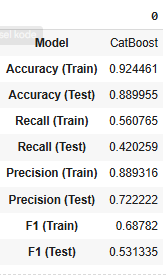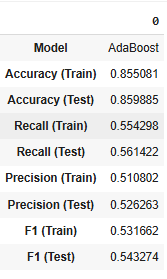

**Kesimpulan**
- Model yang tidak terlalu overfitting dan stabil adalah AdaBoost, walaupun CatBoost memiliki kesetabilan dan rata-rata score tertinggi tapi CatBoost teridentifikasi memiliki overfitting yang lebih sedikit. Hal ini penting jika sudah ada di tahap produksi karena skor yang dihasilkan oleh CatBoost akan lebih tidak akurat jika belajar dari data baru yang belum pernah dilihat sedangkan AdaBoost akan memberikan hasil yang lebih realistis jika dilatih dengan data baru.

- Tahap selanjutnya mencari resampling terbaik untuk model (AdaBoost)

### Mencari resampling terbaik pada best model (AdaBoost) dengan data_ml_drop

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

data_ml_drop = pd.read_csv('data_ml_drop.csv')

# feature engeneering
def feature_engineering(data_ml_drop):
    data_ml_drop = data_ml_drop.copy() # menggunakan .copy() agar lebih aman untuk manipulasi data selanjutnya
    data_ml_drop = data_ml_drop.drop(columns=[col for col in ['index', 'level_0'] if col in data_ml_drop.columns]) # Hapus kolom index yang mungkin tertinggal dalam feature_engineering()
    data_ml_drop['loan_burden'] = ((data_ml_drop['housing']=='yes') & (data_ml_drop['loan']=='yes')).astype(int)# nasabah yang memiliki 2 beban pinjaman
    data_ml_drop['economic_stability'] = data_ml_drop['emp.var.rate'] + data_ml_drop['cons.conf.idx']# Indikator stabilitas makro ekonomi pada suatu negara
    data_ml_drop['contact_count'] = data_ml_drop['previous'] + data_ml_drop['campaign'] #total panggilan sebelum dan sesudah kampanye

    # Age group
    bins = [16, 25, 35, 50, 98]# perhatikan: batas bawah mulai dari 16 agar usia 17 masuk
    labels = ["Muda","Dewasa Muda","Dewasa","Lansia"]
    data_ml_drop['age_group'] = pd.cut(data_ml_drop['age'], bins=bins, labels=labels, include_lowest=True).astype(str)# membuat group bedasarkan umur

    # Month → season
    month_to_season = {
        "mar":"spring","apr":"spring","may":"spring",
        "jun":"summer","jul":"summer","aug":"summer",
        "sep":"fall","oct":"fall","nov":"fall",
        "dec":"winter","jan":"winter","feb":"winter"
    }
    data_ml_drop['season'] = data_ml_drop['month'].str.lower().map(month_to_season) # membuat grop bedasarkan season

    # pdays_group
    data_ml_drop['pdays_group'] = data_ml_drop['pdays'].apply(lambda x: 'No' if x==999 else 'Yes')#mengelompokan selain value:999 yes dan 999:no dikarenakan di penjelasan datanya(kagle) value 999 : belum pernah di contact/dihubungi

    return data_ml_drop


# Kolom OneHot encode
onehot_cols = ['job','marital','education','default','housing','loan','contact','poutcome','pdays_group']
# Kolom ordinal encode
ordinal_cols = ['age_group','season','month','day_of_week']

# ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'), onehot_cols),
    ('ordinal', OrdinalEncoder(), ordinal_cols)
], remainder='passthrough')


# Pisahkan fitur dan target
X = data_ml_drop.drop(['y','duration'], axis=1)
y = data_ml_drop['y']


# Split data jadi Train (80%) dan Test (20%) → Stratified
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=2020
)


# best model
model = AdaBoostClassifier(random_state=42)

# Buat scorer (misal F1-score)
scorer = make_scorer(f1_score)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# RandomUnderSampler
pipe_under = Pipeline([
    ('feature_eng', FunctionTransformer(feature_engineering)),  # Apply feature engineering
    ('preprocessor', preprocessor),
    ('under', RandomUnderSampler(random_state=42)),
    ('clf', model)
])

score_under = cross_val_score(pipe_under, X, y, scoring=scorer, cv=cv)
print("F1-score dengan RandomUnderSampler:", score_under.mean())

# SMOTE
pipe_smote = Pipeline([
    ('feature_eng', FunctionTransformer(feature_engineering)),  # Apply feature engineering
     ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', model)
])

score_smote = cross_val_score(pipe_smote, X, y, scoring=scorer, cv=cv)
print("F1-score dengan SMOTE:", score_smote.mean())

# TomekLinks
pipe_tomek = Pipeline([
    ('feature_eng', FunctionTransformer(feature_engineering)),  # Apply feature engineering
     ('preprocessor', preprocessor),
    ('tomek', TomekLinks(sampling_strategy='auto')),
    ('clf', model)
])
score_tomek = cross_val_score(pipe_tomek, X, y, scoring=scorer, cv=cv)
print("F1-score dengan TomekLinks:", score_tomek.mean())


F1-score dengan RandomUnderSampler: 0.5451411619812719
F1-score dengan SMOTE: 0.5381594682479842
F1-score dengan TomekLinks: 0.4899889876463613


Kita bisa menyimpulkan bahwa identifikasi resampling awal salah setelah menguji coba pada model terbaik yang sebelumnnya identifikasi resampling terbaik menurut jumlah datanya adalah smote saat diuji ternyata random undersampler yang memilki score tertinggi

Untuk tahap selanjutnya hyper parameter tuning dengan menggunakan undersampler untuk resampling

### Hyperparameter tuning

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(random_state=42)
model.get_params()

{'algorithm': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 42}

| Parameter       | Nilai          | Penjelasan                                                                                                                                                                                                            |
| --------------- | -------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `algorithm`     | `'deprecated'` | Parameter ini sudah **tidak digunakan lagi (deprecated)** dalam versi terbaru Scikit-learn. Sebelumnya digunakan untuk memilih metode boosting (`'SAMME'` / `'SAMME.R'`). Sekarang hanya `'SAMME.R'` yang berlaku. |
| `estimator`     | `None`         | Artinya model default yang digunakan untuk boosting adalah **`DecisionTreeClassifier`** dengan max depth 1 (stump).                                                                                                   |
| `learning_rate` | `1.0`          | Faktor pengali dari kontribusi setiap estimator. Nilai ini **mengontrol kekuatan koreksi kesalahan**. Nilai lebih kecil = pembelajaran lebih lambat tapi lebih stabil.                                                |
| `n_estimators`  | `50`           | Jumlah maksimum **model dasar (weak learners)** yang akan digunakan. Lebih banyak estimator bisa meningkatkan performa tapi juga bisa overfit jika tidak dikontrol.                                                   |
| `random_state`  | `42`           | Menetapkan seed untuk memastikan hasil yang **reproducible**. Artinya hasil model akan selalu sama setiap kali dijalankan dengan data yang sama.                                                                      |



Tahap selanjutnya adalah melakukan tuning untuk 2 parameter yaitu  n_estimator dan learning rate dengan best resampling(random undersampler). Metode yang digunakan adalah GridSearch untuk mendapatkan hasil tuning yang paling optimal meskipun akan memakan waktu komputasi yang lebih intensif

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from imblearn.under_sampling import RandomUnderSampler

pipeline = Pipeline([
    ('feature_eng', FunctionTransformer(feature_engineering)),
    ('preprocessor', preprocessor),
    ('under', RandomUnderSampler(random_state=42)),
    ('classifier' , AdaBoostClassifier(random_state=42))
])

param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.1, 0.5, 1.0],
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best f1 score:", grid_search.best_score_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters: {'classifier__learning_rate': 0.5, 'classifier__n_estimators': 100}
Best f1 score: 0.5384942278074902


### Remodeling dengan best model, best resampling dan best parameter dengan data_ml_drop

In [ ]:
import pandas as pd
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from imblearn.under_sampling import RandomUnderSampler


data_ml_drop = pd.read_csv('data_ml_drop.csv')

# feature engeneering
def feature_engineering(data_ml_drop):
    data_ml_drop = data_ml_drop.copy() # menggunakan .copy() agar lebih aman untuk manipulasi data selanjutnya
    data_ml_drop = data_ml_drop.drop(columns=[col for col in ['index', 'level_0'] if col in data_ml_drop.columns]) # Hapus kolom index yang mungkin tertinggal dalam feature_engineering()
    data_ml_drop['loan_burden'] = ((data_ml_drop['housing']=='yes') & (data_ml_drop['loan']=='yes')).astype(int)# nasabah yang memiliki 2 beban pinjaman
    data_ml_drop['economic_stability'] = data_ml_drop['emp.var.rate'] + data_ml_drop['cons.conf.idx']# Indikator stabilitas makro ekonomi pada suatu negara
    data_ml_drop['contact_count'] = data_ml_drop['previous'] + data_ml_drop['campaign'] #total panggilan sebelum dan sesudah kampanye

    # Age group
    bins = [16, 25, 35, 50, 98]# perhatikan: batas bawah mulai dari 16 agar usia 17 masuk
    labels = ["Muda","Dewasa Muda","Dewasa","Lansia"]
    data_ml_drop['age_group'] = pd.cut(data_ml_drop['age'], bins=bins, labels=labels, include_lowest=True).astype(str)# membuat group bedasarkan umur

    # Month → season
    month_to_season = {
        "mar":"spring","apr":"spring","may":"spring",
        "jun":"summer","jul":"summer","aug":"summer",
        "sep":"fall","oct":"fall","nov":"fall",
        "dec":"winter","jan":"winter","feb":"winter"
    }
    data_ml_drop['season'] = data_ml_drop['month'].str.lower().map(month_to_season) # membuat grop bedasarkan season

    # pdays_group
    data_ml_drop['pdays_group'] = data_ml_drop['pdays'].apply(lambda x: 'No' if x==999 else 'Yes')#mengelompokan selain value:999 yes dan 999:no dikarenakan di penjelasan datanya(kagle) value 999 : belum pernah di contact/dihubungi

    return data_ml_drop


# Kolom OneHot encode
onehot_cols = ['job','marital','education','default','housing','loan','contact','poutcome','pdays_group']
# Kolom ordinal encode
ordinal_cols = ['age_group','season','month','day_of_week']

# ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'), onehot_cols),
    ('ordinal', OrdinalEncoder(), ordinal_cols)
], remainder='passthrough')


# Pisahkan fitur dan target
X = data_ml_drop.drop(['y','duration'], axis=1)
y = data_ml_drop['y']

# Split data jadi Train (80%) dan Test (20%) → Stratified
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=2020
)

model_results = []

pipeline = Pipeline([
    ('feature_eng', FunctionTransformer(feature_engineering)),  # FE
    ('preprocessor', preprocessor),                             # OneHot + Ordinal
    ('under', RandomUnderSampler(random_state=42)),
    ('AdaBoost', AdaBoostClassifier(learning_rate=0.5, n_estimators=100, random_state=42))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results.append({
    'Model': 'AdaBoost',
    'Accuracy': acc,
    'Recall': rec,
    'Precision': prec,
    'F1': f1
})


# Tampilkan hasil perbandingan
results_df = pd.DataFrame(model_results)
result_df = results_df.sort_values(by='F1', ascending=False)
result_df

,Model,Accuracy,Recall,Precision,F1
0,AdaBoost,0.860365,0.62069,0.525068,0.568889


Hasil diatas adalah hasil HyperParameter tuning dengan menggunakan AdaBoost, resampling dan menggunakan base parameter

## Perbandingan score base model dengan  baging, boosting

Selanjutnya adalah membandingkan hasil base model dengan metode ensemble yang telah dilakukan sebelumnya, yaitu bagging dan boosting>

- Base model

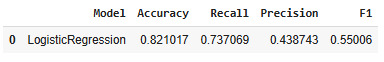

- Bagging dan Boosting

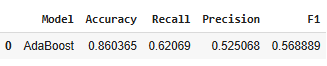

Kesimpulan

Karena fokus pada recall maka keputusannya model terbaik adalah  base model (logistic regression)  untuk tahap selanjutnya yang mau di evaluasi  dikarenakan ada beberapa alasan yaitu :    
- recall tinggi yang berarti mampu menangkap lebih banyak kasus positif (nasabah yang berlangganan)
- Base model merupakan model yang **ringan dan cepat diproses**, jauh lebih efisien dibandingkan algoritma *ensemble* seperti **Bagging** atau **Boosting** yang membutuhkan waktu pelatihan dan prediksi lebih lama.

## Final Model dengan LogisticRegression, best resampling dan best parameter dengan data_ml_drop

### Final modeling

In [ ]:
import pandas as pd
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder,FunctionTransformer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from imblearn.under_sampling import RandomUnderSampler


data_ml_drop = pd.read_csv('data_ml_drop.csv')

# feature engeneering
def feature_engineering(data_ml_drop):
    data_ml_drop = data_ml_drop.copy() # menggunakan .copy() agar lebih aman untuk manipulasi data selanjutnya
    data_ml_drop = data_ml_drop.drop(columns=[col for col in ['index', 'level_0'] if col in data_ml_drop.columns]) # Hapus kolom index yang mungkin tertinggal dalam feature_engineering()
    data_ml_drop['loan_burden'] = ((data_ml_drop['housing']=='yes') & (data_ml_drop['loan']=='yes')).astype(int)# nasabah yang memiliki 2 beban pinjaman
    data_ml_drop['economic_stability'] = data_ml_drop['emp.var.rate'] + data_ml_drop['cons.conf.idx']# Indikator stabilitas makro ekonomi pada suatu negara
    data_ml_drop['contact_count'] = data_ml_drop['previous'] + data_ml_drop['campaign'] #total panggilan sebelum dan sesudah kampanye

    # Age group
    bins = [16, 25, 35, 50, 98]# perhatikan: batas bawah mulai dari 16 agar usia 17 masuk
    labels = ["Muda","Dewasa Muda","Dewasa","Lansia"]
    data_ml_drop['age_group'] = pd.cut(data_ml_drop['age'], bins=bins, labels=labels, include_lowest=True).astype(str)# membuat group bedasarkan umur

    # Month → season
    month_to_season = {
        "mar":"spring","apr":"spring","may":"spring",
        "jun":"summer","jul":"summer","aug":"summer",
        "sep":"fall","oct":"fall","nov":"fall",
        "dec":"winter","jan":"winter","feb":"winter"
    }
    data_ml_drop['season'] = data_ml_drop['month'].str.lower().map(month_to_season) # membuat grop bedasarkan season

    # pdays_group
    data_ml_drop['pdays_group'] = data_ml_drop['pdays'].apply(lambda x: 'No' if x==999 else 'Yes')#mengelompokan selain value:999 yes dan 999:no dikarenakan di penjelasan datanya(kagle) value 999 : belum pernah di contact/dihubungi

    return data_ml_drop


# Kolom OneHot encode
onehot_cols = ['job','marital','education','default','housing','loan','contact','poutcome','pdays_group']
# Kolom ordinal encode
ordinal_cols = ['age_group','season','month','day_of_week']

# ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'), onehot_cols),
    ('ordinal', OrdinalEncoder(), ordinal_cols)
], remainder='passthrough')


# Pisahkan fitur dan target
X = data_ml_drop.drop(['y','duration'], axis=1)
y = data_ml_drop['y']

# Split data jadi Train (80%) dan Test (20%) → Stratified
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=2020
)

model_results = []

pipeline = Pipeline([
    ('feature_eng', FunctionTransformer(feature_engineering)),  # FE
    ('preprocessor', preprocessor),                             # OneHot + Ordinal
    ('under', RandomUnderSampler(random_state=42)),
    ('LogisticRegression', LogisticRegression( penalty= 'l1', solver= 'liblinear'))## C dan Class_weight dimasukan parameternya dikarenakan sama seperti defaultnya saat tuning
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results.append({
    'Model': 'LogisticRegression',
    'Accuracy': acc,
    'Recall': rec,
    'Precision': prec,
    'F1': f1
})


# Tampilkan hasil perbandingan
results_df = pd.DataFrame(model_results)
result_df = results_df.sort_values(by='F1', ascending=False)
result_df

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,Model,Accuracy,Recall,Precision,F1
0,LogisticRegression,0.823257,0.738147,0.442793,0.553535


### Metrik evaluation (Confusion Metrik)

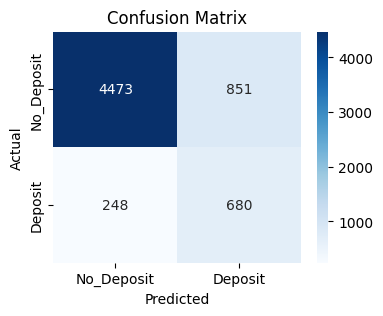

In [ ]:
from sklearn.metrics import recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# (Opsional) Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No_Deposit', 'Deposit'], yticklabels=['No_Deposit', 'Deposit'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Dari grafik diatas kita bisa simpulkan

- TP (True Positive): 680 nasabah yang diprediksi deposit dan memang deposit

- FP (False Positive): 851 nasabah yang diprediksi deposit, padahal tidak

- FN (False Negative): 248 nasabah yang diprediksi tidak deposit, padahal sebenarnya deposit

- TN (True Negative): 4473 nasabah yang diprediksi tidak deposit dan memang tidak deposit

Estimasi kerugian :

- Fokus Recall = TP / (TP + FN) = 680 / (680 + 248) ≈ 0.73 Artinya :    
   - model melewatkan sekitar 27% pelanggan yang sebenarnya akan deposit, tetapi diprediksi tidak
   - resikonya Pelanggan yang sebenarnya ingin deposit tidak dihubungi atau tidak di-follow up → kehilangan peluang pendapatan
   - Asumsi Kerugian:Misalnya, potensi pendapatan rata-rata dari 1 pelanggan deposit adalah Rp50.000.000 maka 50.000.000 x 248 = **12.400.000.000** yang bisa terlewatkan


- Fokus Precision = TP / (TP + FP) = 680 / (680 + 851) ≈ 0.44 Artinya :   
   - Artinya, hanya 44% nasabah yang diprediksi akan deposit ternyata benar. Sebanyak 56% melakukan campaign sia-sia.
   - resikonya Menghabiskan biaya (telepon, tenaga kerja) untuk pihak bank yang menghubungi nasabah yang tidak tertarik untuk deposit.
   - Asumsi kerugian misal biaya per panggilan (nasabah) = Rp 20.000 dan biaya lembur saat campaign perhari 2 jam Jam 1 lembur → Rp 100.000 × 1.25 = Rp 125.000 Jam 2 lembur → Rp 100.000 × 1.375 = Rp 137.500
→ Jadi total biaya lembur 2 jam ≈ Rp 262.500 per hari tambahan di atas biaya 12 jam kerja normal selama campaign di data ini ada 10 bulan jadi misal 1 bulan ada 20 hari kerja jadi 10(bulan) x 20 = 200 jam/10 bulan misal pegawai ada 10 yang lembur di bagian marketing jadi jadi 200 x 10 = 2000 dan total estimasi dalam 10 bulan biaya pekerja 262.500 x 2000 = 525.000.000. jadi total estimasi 20.000 x 851 = 17.000.000 dan 17.000.000 + 525.000.000 = **542.000.000** itu belum dihitung jam pokok

Catatan tambahan :  
Dari laporan Vodafone Portugal tertanggal 29 Agustus 2008 menyebutkan tarif roaming: panggilan ke/dari negara‑UE dikenakan biaya  €0,10‑€0,30 per menit sedangkan panggilan diterima sebesar €0,22 per menit.

| Kategori                             | Nilai estimasi                                          | Keterangan                                         |
| ------------------------------------ | ------------------------------------------------------- | -------------------------------------------------- |
| Biaya panggilan telepon (lokal)      | ~ €0,10‑€0,30 per menit (≈ Rp 1.600‑Rp 4.800 per menit) | Berdasarkan tarif roaming; lokal bisa lebih rendah |
| Biaya panggilan 5 menit              | ~ €0,50‑€1,50 (≈ Rp 8.000‑Rp 24.000)                    | Asumsi 5 menit telemarketing                       |
| Upah dasar per jam                   | ~ €2,66 (≈ Rp 43.000 jika €1 ≈ Rp 16.000)               | Berdasarkan upah minimum bulanan €426              |
| Upah lembur (jam pertama hari kerja) | ~ €3,99 per jam                                         | +50% tambahan lembur                               |
| Upah lembur (jam selanjutnya)        | ~ €4,66 per jam                                         | +75% tambahan lembur                               |



- Fokus F1 Score = 2 × (Precision × Recall) / (Precision + Recall) ≈ 0.55
    - resiko Jika perusahaan ingin mempertahankan semua potensi pelanggan deposit sambil meminimalisir salah menghubungi nasabah, maka:Waktu dan uang akan lebih banyak terbakar, Tapi bisa jadi ada peningkatan jangka panjang dalam konversi nasabah

    - Estimasi Potensi Total Kerugian Kombinasi:
        - Peluang kehilangan pelanggan deposit: Rp12.400.000.000
        - Biaya promosi salah sasaran: Rp542.000.000
        - total estimasi 12.400.000.000 + 542.000.000 = 12.942.000.000
      

### Metrik Evaluation ( ROC & AUC )

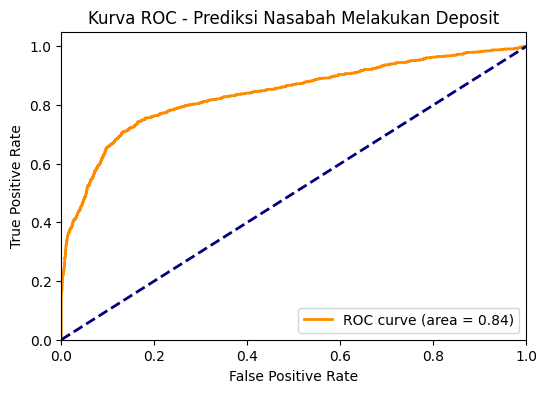

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC - Prediksi Nasabah Melakukan Deposit')
plt.legend(loc='lower right')
plt.show()


1. AUC (Area Under the Curve) = 0.84

    - Ini menunjukkan bahwa model memiliki kemampuan yang sangat baik dalam     membedakan antara nasabah yang akan melakukan deposit dan yang tidak.

    - Nilai AUC berada pada skala 0–1, dan semakin mendekati 1, semakin baik    performa klasifikasi model.

    - AUC 0.84 berarti bahwa dalam 84% kasus, model dapat membedakan secara benar antara nasabah positif (akan deposit) dan negatif (tidak deposit).

2. ROC Curve Menjauhi Garis Diagonal (Random Guess)

    - Garis biru putus-putus (diagonal) merepresentasikan model tebakan acak (AUC =     0.5).
    
    - Karena kurva oranye jauh di atas diagonal, ini mengindikasikan bahwa model    memiliki prediksi yang lebih baik dari acak dan cukup dapat dipercaya.
    
    - Trade-off antara True Positive Rate (TPR) dan False Positive Rate (FPR)
    
    - Di sepanjang kurva, terlihat model bisa mendapatkan TPR (recall) tinggi     meskipun tetap menjaga FPR rendah pada beberapa threshold.
    
    - Hal ini berguna ketika kamu ingin menyesuaikan threshold tergantung pada fokus bisnis (misalnya, lebih fokus pada menghindari kerugian dari salah targeting).

| **Skor AUC** | **Kualitas Model**          | **Interpretasi**                          |
| ------------ | --------------------------- | ----------------------------------------- |
| 0.5          | **Random Guessing**         | Tidak lebih baik dari tebak-tebakan       |
| 0.6 – 0.7    | **Poor (Lemah)**            | Model kurang baik dalam klasifikasi       |
| 0.7 – 0.8    | **Fair (Cukup Baik)**       | Masih bisa diterima, tapi perlu perbaikan |
| 0.8 – 0.9    | **Good (Bagus)**            | Model cukup akurat dalam membedakan kelas |
| 0.9 – 1.0    | **Excellent (Sangat Baik)** | Model sangat akurat dan bisa diandalkan   |


### Shap Grafik

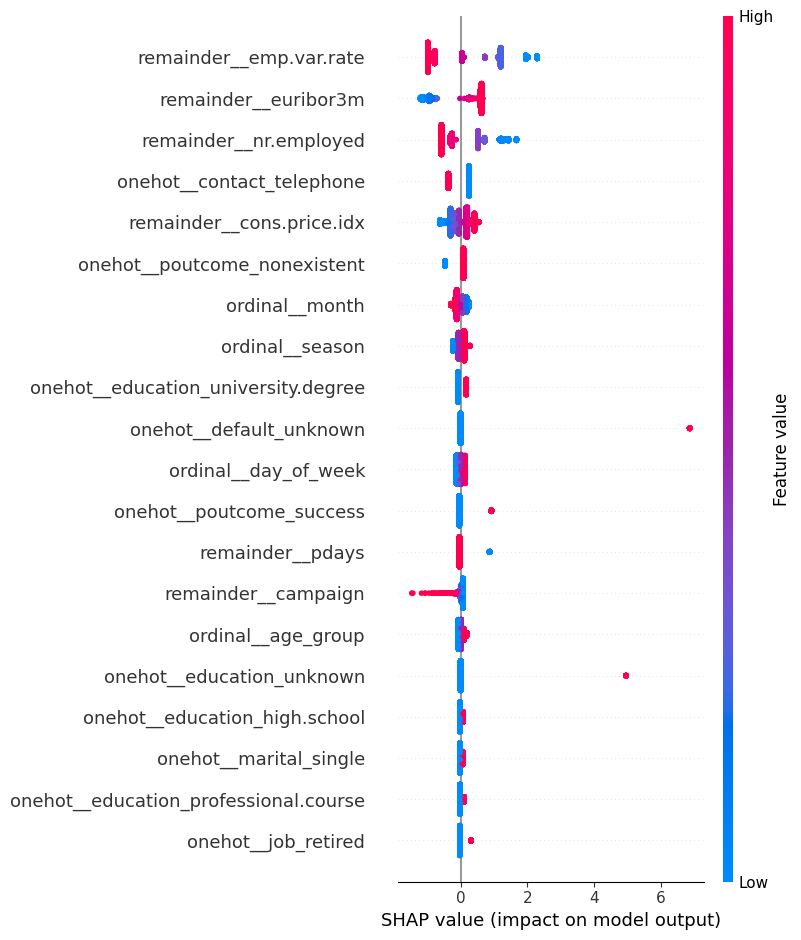

In [ ]:
import shap
import pandas as pd
import shap
import pandas as pd

# 1. Jalankan feature engineering
X_test_fe = feature_engineering(X_test)

# 2. Transformasi data
X_test_transformed = pipeline.named_steps['preprocessor'].transform(X_test_fe)

# 3. Ambil nama fitur output dari preprocessor
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out(input_features=X_test_fe.columns)

# 4. Buat DataFrame dari hasil transformasi dengan nama kolom yang benar
X_test_df = pd.DataFrame(X_test_transformed, columns=feature_names)

# 5. Ambil model LogisticRegression dari pipeline
model = pipeline.named_steps['LogisticRegression']

# 6. Buat explainer SHAP
explainer = shap.Explainer(model, X_test_df)  # <-- gunakan DataFrame dengan nama kolom

# 7. Dapatkan SHAP values
shap_values = explainer(X_test_df)

# 8. Plot summary dengan nama fitur
shap.summary_plot(shap_values, X_test_df)


penjelasan :    
- Sumbu Y (Vertikal): Nama-nama fitur setelah transformasi (OneHot, Ordinal, dll.)

- Sumbu X (Horizontal): Nilai SHAP (impact terhadap prediksi). Semakin ke kanan, semakin mendorong prediksi ke arah deposit (kelas 1), dan ke kiri ke arah tidak deposit (kelas 0).

- Warna Titik:

    - Merah = nilai fitur tinggi

    - Biru = nilai fitur rendah


Insight dari grafik shap:

1. remainder__emp.var.rate

    - Ini adalah "employment variation rate" — perubahan tingkat pengangguran.
    
    - SHAP-nya sangat mempengaruhi prediksi.
    
    - Titik biru (rendah) cenderung di sisi kanan → mendukung prediksi deposit
    
    - Artinya: Semakin rendah tingkat pengangguran, maka makin tinggi kemungkinan seseorang akan deposit.

2. remainder__euribor3m

    - Ini adalah suku bunga Euribor 3 bulan.

    - Titik merah (tinggi) mengarah ke kanan → tinggi Euribor = mendorong prediksi deposit.

    - Interpretasi: Tingkat suku bunga yang tinggi bisa jadi mendorong orang untuk berinvestasi dalam produk bank.

3. remainder__nr.employed

    - Total jumlah pegawai.

    - Titik biru (jumlah pegawai rendah) ke kanan → mendukung deposit.

    - Mungkin dalam situasi ekonomi lesu (sedikit pegawai), nasabah tertarik pada penawaran bank.

4. onehot__contact_telephone

    - Jenis kontak: telepon.

    - Titik merah (kontak = telepon) lebih ke kiri → menurunkan peluang deposit.

    - Artinya: Kontak lewat telepon cenderung tidak efektif, dibandingkan cellular (yang mungkin tidak ditampilkan karena drop='first').

5. remainder__cons.price.idx

    - Indeks harga konsumen.

    - Pengaruhnya kecil, tapi ada variasi — tergantung nilainya bisa ke kiri/kanan.

6. onehot__poutcome_nonexistent

    - Hasil kampanye sebelumnya tidak ada.

    - Mendorong ke kiri (tidak deposit).

    - Nasabah yang belum pernah dikontak sebelumnya cenderung tidak tertarik.

7. ordinal__month dan ordinal__season

    - Waktu kampanye memengaruhi hasil.

    - Nilai SHAP menunjukkan perbedaan berdasarkan bulan/musim tertentu.

8. onehot__education_university.degree

    - Pendidikan tinggi cenderung mengarah ke kanan → peluang deposit lebih tinggi.

### Feature Importance

In [ ]:
# Pastikan pipeline sudah fit
pipeline.fit(X_train, y_train)

# Ambil koefisien dari Logistic Regression
coef = pipeline.named_steps['LogisticRegression'].coef_[0]

# Ambil nama fitur setelah preprocessor
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Buat DataFrame
import pandas as pd
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': coef
}).sort_values(by='importance', key=abs, ascending=False)

print(feature_importance_df)


                                  feature  importance
21                onehot__default_unknown    6.849782
20              onehot__education_unknown    4.948893
25                   onehot__loan_unknown    2.748644
10                    onehot__job_unknown    2.322181
13                onehot__marital_unknown    1.790105
23                onehot__housing_unknown    1.568873
29               onehot__poutcome_success    0.952186
39                remainder__emp.var.rate   -0.651688
27              onehot__contact_telephone   -0.608640
28           onehot__poutcome_nonexistent    0.547742
40              remainder__cons.price.idx    0.432600
42                   remainder__euribor3m    0.384154
4                     onehot__job_retired    0.335226
19    onehot__education_university.degree    0.247677
32                        ordinal__season    0.167976
6                    onehot__job_services   -0.154840
14             onehot__education_basic.6y    0.146832
18  onehot__education_profes

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


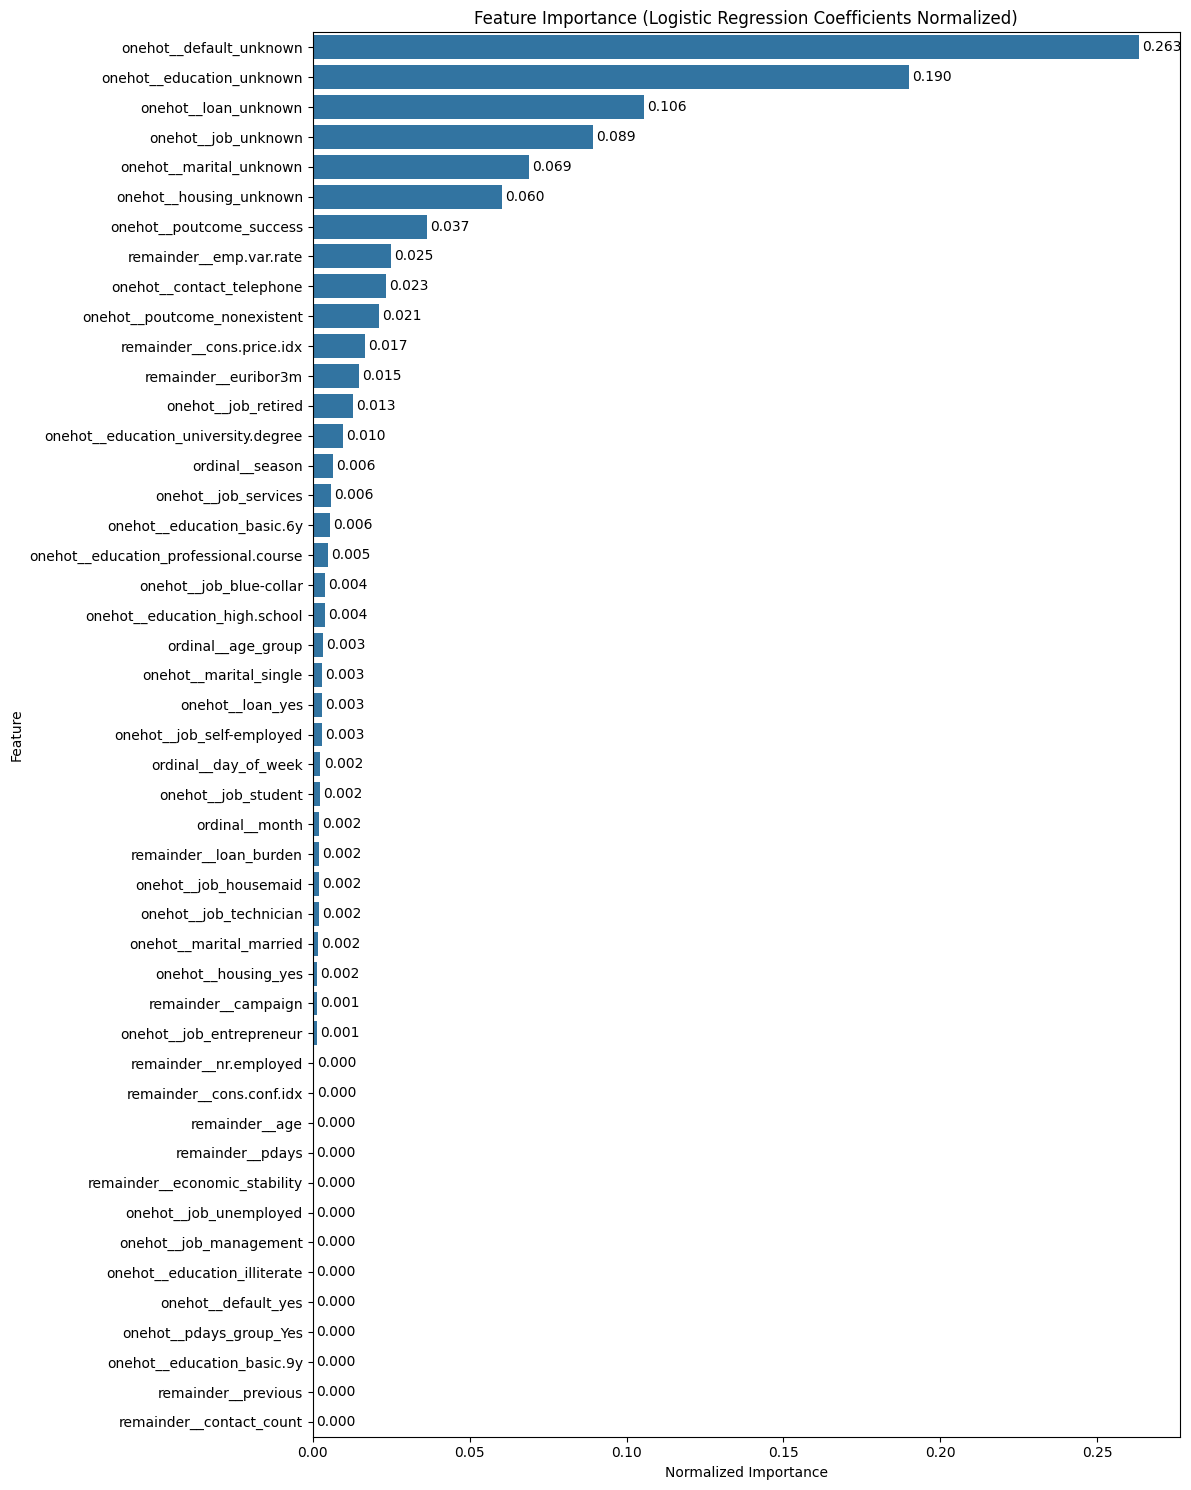

In [ ]:
# Normalisasi importance berdasarkan nilai absolut
feature_importance_df['NormalizedImportance'] = feature_importance_df['importance'].abs() / feature_importance_df['importance'].abs().sum()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 15))
ax = sns.barplot(x='NormalizedImportance', y='feature', data=feature_importance_df)

# Tambahkan label angka di ujung bar
for p in ax.patches:
    width = p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.text(width + 0.001, y, f'{width:.3f}', va='center', fontsize=10, ha='left')

plt.title('Feature Importance (Logistic Regression Coefficients Normalized)')
plt.xlabel('Normalized Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


##Penjelasan Feature Importance

4 variable tertinggi dari fitur importance adalah sebagai berikut

onehot__default_unknown    6.849782

onehot__education_unknown    4.948893

onehot__loan_unknown    2.748644

onehot__job_unknown    2.322181


  - Default_Unknown memiliki nilai paling tinggi menunjukan bahwa seseorang yang tidak diketahui memiliki sejarah gagal bayar akan memiliki pengaruh kuat terhadap keputusannya dalam melakukan deposit.
  - Dalam dataset ini, beberapa variable tidak menangkap nuance data secara komprehensif, sebagai contoh pendidikan paling tinggi ada di University Degree tapi tidak menjelaskan secara lebih granular apakah mereka memegang Master Degree atau Doktorat. Mungkin dataset tidak menangkap granularitas tingkat pendidikan ini sehingga data pelanggan dengan pendidikan lebih tinggi, atau pekerjaan yang lebih niche tidak tertangkap sehingga ditulis dengan nilai Unknown



### Save ke joblib

In [ ]:
import joblib

# Simpan model
joblib.dump(pipeline, 'best_model_pediksi_deposit.pkl', compress=3) #compress digunakan pada model ukuran besar tapi ini saya pakai hanya opsional agar tahu kegunaannya

# Muat model
model_load = joblib.load('best_model_pediksi_deposit.pkl')

# model siap prediksi
model_load.predict(X)

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
import sklearn
print(sklearn.__version__)


1.6.1


In [ ]:
import platform
print(platform.python_version())


3.12.12
